In [2]:
# Basic imports
import sys
from Allohubpy import SAtraj
from Allohubpy import Overlap
from Allohubpy import SANetwork
from Allohubpy import TrajProcessor
from Allohubpy.plotter import Allohub_plots
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject

In [7]:
# Utility functions to store results
def save_array_to_txt(array, filename, delimiter=',', fmt='%.18e'):
    """
    Saves a NumPy array to a text file.

    Parameters:
        array (numpy.ndarray): The NumPy array to save.
        filename (str): The path to the output text file.
        delimiter (str): The string used to separate values (default is ',').
        fmt (str): Format for each element in the array (default is '%.18e' for scientific notation).
    """
    try:
        np.savetxt(filename, array, delimiter=delimiter, fmt=fmt)
        print(f"Array saved successfully to {filename}")
    except Exception as e:
        print(f"Error saving array: {e}")

## Comparing advantages of randomized vs non randomized blocks

In this example the trajectories will be loaded first and encoded into two different alphabets (M32K25 and 3DI).
For faster encoding, removing the water molecules as well as removing unnecessary atoms will speed up the calculations.

The specified Structural Alphabet is initialized and the data is loaded.
The package comes by default with the M32K25 and 3DI Structural Alphabets, but other alphabets can be provided as a list of possible inputs.

We will use *skip 100* to skip the frist 100 frames of each trajectory (corresponding to 1 ns) as equilibration.
The argument *stride* will extract every 10th frame producing an spacing of 1 ns between frames.

## Trajectory encoding

The first step is to convert the MD trajectories into the Structural Alphabet of choice

In [3]:
# Other alphabets can be easily added to the analysis using the AbsEncoder class. 
# Absencoder takes

# Encoder for 3DI
enc_3di = TrajProcessor.Encoder3DI("encoded_NtrC_repl1_3di.sa")

# Encoder for M32K25
enc_mk = TrajProcessor.SAEncoder("encoded_NtrC_repl1_mk.sa")

# Trajectory is saved every 10 ps. with stride = 10 only the 1-th frames will be processed producing an spacing of 100 ps between frames
# We skip 100 frames -> 1ns as extra equilibration

## Load repl1 of condition 1
enc_3di.load_trajectory(topology="data_NtrC/NtrC_inactive_nowat.pdb", mdtraj="data_NtrC/NtrC_inactive_repl1.xtc", skip=100, stride=10)
enc_3di.encode()

enc_mk.load_trajectory(topology="data_NtrC/NtrC_inactive_nowat.pdb", mdtraj="data_NtrC/NtrC_inactive_repl1.xtc", skip=100, stride=10)
enc_mk.encode()

print("Encoded NtrC inactive repl1")

## Load repl2 of condition 1
enc_3di.set_output_file("encoded_NtrC_repl2_3di.sa")
enc_mk.set_output_file("encoded_NtrC_repl2_mk.sa")

enc_3di.load_trajectory(topology="data_NtrC/NtrC_inactive_nowat.pdb", mdtraj="data_NtrC/NtrC_inactive_repl2.xtc", skip=100, stride=10)
enc_3di.encode()

enc_mk.load_trajectory(topology="data_NtrC/NtrC_inactive_nowat.pdb", mdtraj="data_NtrC/NtrC_inactive_repl2.xtc", skip=100, stride=10)
enc_mk.encode()

print("Encoded NtrC inactive repl2")

## Load repl3 of condition 1
enc_3di.set_output_file("encoded_NtrC_repl3_3di.sa")
enc_mk.set_output_file("encoded_NtrC_repl3_mk.sa")

enc_3di.load_trajectory(topology="data_NtrC/NtrC_inactive_nowat.pdb", mdtraj="data_NtrC/NtrC_inactive_repl3.xtc", skip=100, stride=10)
enc_3di.encode()

enc_mk.load_trajectory(topology="data_NtrC/NtrC_inactive_nowat.pdb", mdtraj="data_NtrC/NtrC_inactive_repl3.xtc", skip=100, stride=10)
enc_mk.encode()

print("Encoded NtrC inactive repl3")

## Load repl1 of condition 2
enc_3di.set_output_file("encoded_NtrC_active_repl1_3di.sa")
enc_mk.set_output_file("encoded_NtrC_active_repl1_mk.sa")

enc_3di.load_trajectory(topology="data_NtrC/NtrC_active_nowat.pdb", mdtraj="data_NtrC/NtrC_active_repl1.xtc", skip=100, stride=10)
enc_3di.encode()

enc_mk.load_trajectory(topology="data_NtrC/NtrC_active_nowat.pdb", mdtraj="data_NtrC/NtrC_active_repl1.xtc", skip=100, stride=10)
enc_mk.encode()

print("Encoded NtrC active repl1")

## Load repl2 of condition 2
enc_3di.set_output_file("encoded_NtrC_active_repl2_3di.sa")
enc_mk.set_output_file("encoded_NtrC_active_repl2_mk.sa")

enc_3di.load_trajectory(topology="data_NtrC/NtrC_active_nowat.pdb", mdtraj="data_NtrC/NtrC_active_repl2.xtc", skip=100, stride=10)
enc_3di.encode()

enc_mk.load_trajectory(topology="data_NtrC/NtrC_active_nowat.pdb", mdtraj="data_NtrC/NtrC_active_repl2.xtc", skip=100, stride=10)
enc_mk.encode()

print("Encoded NtrC active repl2")

## Load repl3 of condition 3
enc_3di.set_output_file("encoded_NtrC_active_repl3_3di.sa")
enc_mk.set_output_file("encoded_NtrC_active_repl3_mk.sa")

enc_3di.load_trajectory(topology="data_NtrC/NtrC_active_nowat.pdb", mdtraj="data_NtrC/NtrC_active_repl3.xtc", skip=100, stride=10)
enc_3di.encode()

enc_mk.load_trajectory(topology="data_NtrC/NtrC_active_nowat.pdb", mdtraj="data_NtrC/NtrC_active_repl3.xtc", skip=100, stride=10)
enc_mk.encode()

print("Encoded NtrC active repl3")

Encoded NtrC inactive repl1
Encoded NtrC inactive repl2
Encoded NtrC inactive repl3
Encoded NtrC active repl1
Encoded NtrC active repl2
Encoded NtrC active repl3


This block illustrates the performance of the method in regard to different time-block sizes, which affect the number and quality of the derived MI matrices, and the randomization of time-blocks, yielding partially time-averaged MI matrices.

## Initialize Structural Alphabet trajectory handler
print("Initialize Structural Alphabet trajectory handler")

## Set seeds for reproducibility
seed = 42  # Replace with any integer
import random
np.random.seed(seed)
random.seed(seed)

## With randomization
sa_ntrc_active_100_1 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_100_2 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_100_3 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_inactive_100_1 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_100_2 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_100_3 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_active_10_1 = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_10_2 = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_10_3 = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_inactive_10_1 = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_10_2 = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_10_3 = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_active_50_1 = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_50_2 = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_50_3 = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_inactive_50_1 = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_50_2 = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_50_3 = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])

## Without randomization
sa_ntrc_active_100_1_norand = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_100_2_norand = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_100_3_norand = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_inactive_100_1_norand = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_100_2_norand = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_100_3_norand = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_active_10_1_norand = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_10_2_norand = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_10_3_norand = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_inactive_10_1_norand = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_10_2_norand = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_10_3_norand = SAtraj.SAtraj(block_size=10, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_active_50_1_norand = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_50_2_norand = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_50_3_norand = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_inactive_50_1_norand = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_50_2_norand = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_50_3_norand = SAtraj.SAtraj(block_size=50, alphabet=SAtraj.ALPHABETS["M32K25"])

## Load encoded data into the model
print("Load encoded data into the model")

sa_ntrc_active_100_1.load_data("data_NtrC/encoded_NtrC_active_repl1_mk.sa")
sa_ntrc_active_100_2.load_data("data_NtrC/encoded_NtrC_active_repl2_mk.sa")
sa_ntrc_active_100_3.load_data("data_NtrC/encoded_NtrC_active_repl3_mk.sa")

sa_ntrc_inactive_100_1.load_data("data_NtrC/encoded_NtrC_inactive_repl1_mk.sa")
sa_ntrc_inactive_100_2.load_data("data_NtrC/encoded_NtrC_inactive_repl2_mk.sa")
sa_ntrc_inactive_100_3.load_data("data_NtrC/encoded_NtrC_inactive_repl3_mk.sa")

sa_ntrc_active_10_1.load_data("data_NtrC/encoded_NtrC_active_repl1_mk.sa")
sa_ntrc_active_10_2.load_data("data_NtrC/encoded_NtrC_active_repl2_mk.sa")
sa_ntrc_active_10_3.load_data("data_NtrC/encoded_NtrC_active_repl3_mk.sa")

sa_ntrc_inactive_10_1.load_data("data_NtrC/encoded_NtrC_inactive_repl1_mk.sa")
sa_ntrc_inactive_10_2.load_data("data_NtrC/encoded_NtrC_inactive_repl2_mk.sa")
sa_ntrc_inactive_10_3.load_data("data_NtrC/encoded_NtrC_inactive_repl3_mk.sa")

sa_ntrc_active_50_1.load_data("data_NtrC/encoded_NtrC_active_repl1_mk.sa")
sa_ntrc_active_50_2.load_data("data_NtrC/encoded_NtrC_active_repl2_mk.sa")
sa_ntrc_active_50_3.load_data("data_NtrC/encoded_NtrC_active_repl3_mk.sa")

sa_ntrc_inactive_50_1.load_data("data_NtrC/encoded_NtrC_inactive_repl1_mk.sa")
sa_ntrc_inactive_50_2.load_data("data_NtrC/encoded_NtrC_inactive_repl2_mk.sa")
sa_ntrc_inactive_50_3.load_data("data_NtrC/encoded_NtrC_inactive_repl3_mk.sa")

sa_ntrc_active_100_1_norand.load_data("data_NtrC/encoded_NtrC_active_repl1_mk.sa", randomize=False)
sa_ntrc_active_100_2_norand.load_data("data_NtrC/encoded_NtrC_active_repl2_mk.sa", randomize=False)
sa_ntrc_active_100_3_norand.load_data("data_NtrC/encoded_NtrC_active_repl3_mk.sa", randomize=False)

sa_ntrc_inactive_100_1_norand.load_data("data_NtrC/encoded_NtrC_inactive_repl1_mk.sa", randomize=False)
sa_ntrc_inactive_100_2_norand.load_data("data_NtrC/encoded_NtrC_inactive_repl2_mk.sa", randomize=False)
sa_ntrc_inactive_100_3_norand.load_data("data_NtrC/encoded_NtrC_inactive_repl3_mk.sa", randomize=False)

sa_ntrc_active_10_1_norand.load_data("data_NtrC/encoded_NtrC_active_repl1_mk.sa", randomize=False)
sa_ntrc_active_10_2_norand.load_data("data_NtrC/encoded_NtrC_active_repl2_mk.sa", randomize=False)
sa_ntrc_active_10_3_norand.load_data("data_NtrC/encoded_NtrC_active_repl3_mk.sa", randomize=False)

sa_ntrc_inactive_10_1_norand.load_data("data_NtrC/encoded_NtrC_inactive_repl1_mk.sa", randomize=False)
sa_ntrc_inactive_10_2_norand.load_data("data_NtrC/encoded_NtrC_inactive_repl2_mk.sa", randomize=False)
sa_ntrc_inactive_10_3_norand.load_data("data_NtrC/encoded_NtrC_inactive_repl3_mk.sa", randomize=False)

sa_ntrc_active_50_1_norand.load_data("data_NtrC/encoded_NtrC_active_repl1_mk.sa", randomize=False)
sa_ntrc_active_50_2_norand.load_data("data_NtrC/encoded_NtrC_active_repl2_mk.sa", randomize=False)
sa_ntrc_active_50_3_norand.load_data("data_NtrC/encoded_NtrC_active_repl3_mk.sa", randomize=False)

sa_ntrc_inactive_50_1_norand.load_data("data_NtrC/encoded_NtrC_inactive_repl1_mk.sa", randomize=False)
sa_ntrc_inactive_50_2_norand.load_data("data_NtrC/encoded_NtrC_inactive_repl2_mk.sa", randomize=False)
sa_ntrc_inactive_50_3_norand.load_data("data_NtrC/encoded_NtrC_inactive_repl3_mk.sa", randomize=False)

## Trajectory examination

It is instructive to examine the encoded trajectoy as well as all other properties using the provided plotting functions.
Alternatively, the user may addapt the provided plotting functions for other applications.
Plotting functions are located in the file Allohub_plots.py .

To display the plots, the argument *action = "show"* should be used, while for saving to a file it should be *action = "save"*.
If the save option is provided, the file name can be specified using the argument *name="my_name.png"*.
The format of the image will depend on the format (extension) specified in the file name.

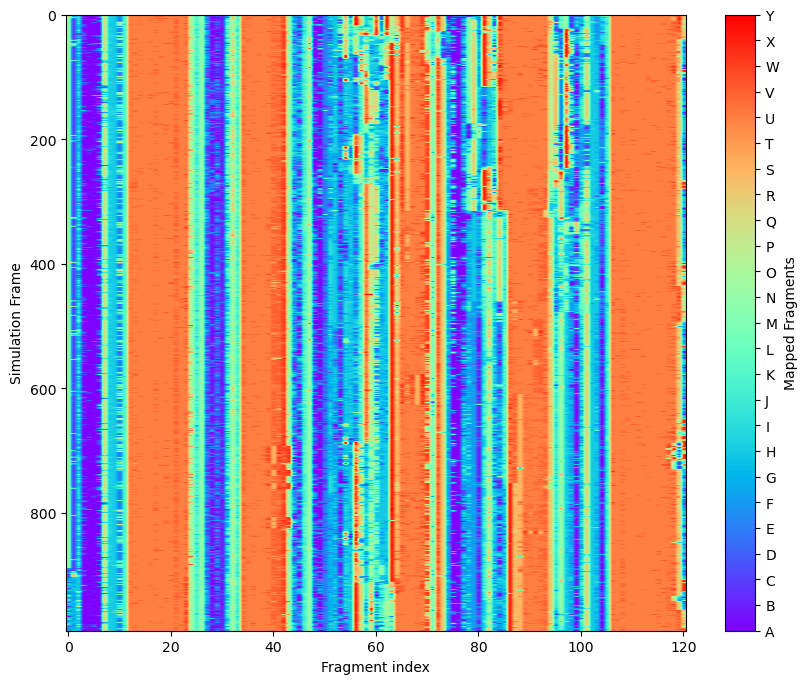

In [5]:
# Plot the randomized trajectory of the Structural Alphabet trajectory of NtrC active repl1
Allohub_plots.plot_SA_traj(sa_ntrc_active_100_1_norand.get_int_traj(), SAtraj.ALPHABETS["M32K25"], action="show")

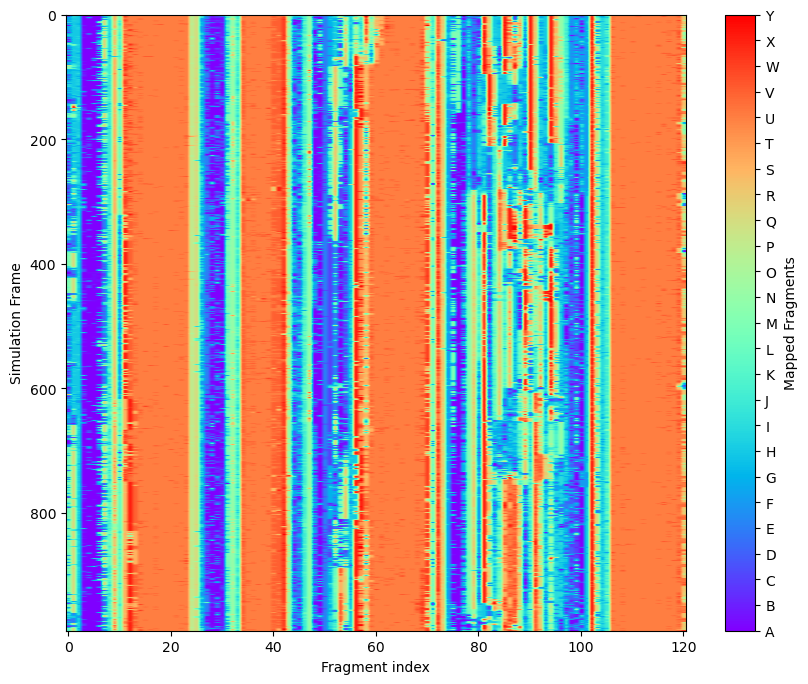

In [6]:
# Plot the randomized trajectory of the Structural Alphabet  trajectory of NtrC inactive repl1
Allohub_plots.plot_SA_traj(sa_ntrc_inactive_100_1_norand.get_int_traj(), SAtraj.ALPHABETS["M32K25"], action="show")

## Mutual information analysis

Now we will proceed to compute the mutual information for each trajectory time-block.
Trajectories with block 100 contain 9 blocks of 100 ns each.
Trajectories with block size 50 contain 19 blocks of 50 ns each.
Trajectories with block size 10 contains 99 blocks of 10 ns each.

In [7]:
print("Calculate the MI information")
# One can specify the number of workers to parallelize the process. max_workers=None would use all available resources.

mi_ntrc_inactive_100_1_norand = sa_ntrc_inactive_100_1_norand.compute_mis(max_workers=7)
print("NtrC inactive, no randomization, block size 100, repl 1 finished")
mi_ntrc_inactive_100_2_norand = sa_ntrc_inactive_100_2_norand.compute_mis(max_workers=7)
print("NtrC inactive, no randomization, block size 100, repl 2 finished")
mi_ntrc_inactive_100_3_norand = sa_ntrc_inactive_100_3_norand.compute_mis(max_workers=7)
print("NtrC inactive, no randomization, block size 100, repl 3 finished")

mi_ntrc_inactive_50_1_norand = sa_ntrc_inactive_50_1_norand.compute_mis(max_workers=7)
print("NtrC inactive, no randomization, block size 50, repl 1 finished")
mi_ntrc_inactive_50_2_norand = sa_ntrc_inactive_50_2_norand.compute_mis(max_workers=7)
print("NtrC inactive, no randomization, block size 50, repl 2 finished")
mi_ntrc_inactive_50_3_norand = sa_ntrc_inactive_50_3_norand.compute_mis(max_workers=7)
print("NtrC inactive, no randomization, block size 50, repl 3 finished")

mi_ntrc_inactive_10_1_norand = sa_ntrc_inactive_10_1_norand.compute_mis(max_workers=7)
print("NtrC inactive, no randomization, block size 10, repl 1 finished")
mi_ntrc_inactive_10_2_norand = sa_ntrc_inactive_10_2_norand.compute_mis(max_workers=7)
print("NtrC inactive, no randomization, block size 10, repl 2 finished")
mi_ntrc_inactive_10_3_norand = sa_ntrc_inactive_10_3_norand.compute_mis(max_workers=7)
print("NtrC inactive, no randomization, block size 10, repl 3 finished")

mi_ntrc_active_100_1_norand = sa_ntrc_active_100_1_norand.compute_mis(max_workers=7)
print("NtrC active, no randomization, block size 100, repl 1 finished")
mi_ntrc_active_100_2_norand = sa_ntrc_active_100_2_norand.compute_mis(max_workers=7)
print("NtrC active, no randomization, block size 100, repl 2 finished")
mi_ntrc_active_100_3_norand = sa_ntrc_active_100_3_norand.compute_mis(max_workers=7)
print("NtrC active, no randomization, block size 100, repl 3 finished")

mi_ntrc_active_50_1_norand = sa_ntrc_active_50_1_norand.compute_mis(max_workers=7)
print("NtrC active, no randomization, block size 50, repl 1 finished")
mi_ntrc_active_50_2_norand = sa_ntrc_active_50_2_norand.compute_mis(max_workers=7)
print("NtrC active, no randomization, block size 50, repl 2 finished")
mi_ntrc_active_50_3_norand = sa_ntrc_active_50_3_norand.compute_mis(max_workers=7)
print("NtrC active, no randomization, block size 50, repl 3 finished")

mi_ntrc_active_10_1_norand = sa_ntrc_active_10_1_norand.compute_mis(max_workers=7)
print("NtrC active, no randomization, block size 10, repl 1 finished")
mi_ntrc_active_10_2_norand = sa_ntrc_active_10_2_norand.compute_mis(max_workers=7)
print("NtrC active, no randomization, block size 10, repl 2 finished")
mi_ntrc_active_10_3_norand = sa_ntrc_active_10_3_norand.compute_mis(max_workers=7)
print("NtrC active, no randomization, block size 10, repl 3 finished")

mi_ntrc_inactive_100_1 = sa_ntrc_inactive_100_1.compute_mis(max_workers=7)
print("NtrC inactive, randomization, block size 100, repl 1 finished")
mi_ntrc_inactive_100_2 = sa_ntrc_inactive_100_2.compute_mis(max_workers=7)
print("NtrC inactive, randomization, block size 100, repl 2 finished")
mi_ntrc_inactive_100_3 = sa_ntrc_inactive_100_3.compute_mis(max_workers=7)
print("NtrC inactive, randomization, block size 100, repl 3 finished")

mi_ntrc_inactive_50_1 = sa_ntrc_inactive_50_1.compute_mis(max_workers=7)
print("NtrC inactive, randomization, block size 50, repl 1 finished")
mi_ntrc_inactive_50_2 = sa_ntrc_inactive_50_2.compute_mis(max_workers=7)
print("NtrC inactive, randomization, block size 50, repl 2 finished")
mi_ntrc_inactive_50_3 = sa_ntrc_inactive_50_3.compute_mis(max_workers=7)
print("NtrC inactive, randomization, block size 50, repl 3 finished")

mi_ntrc_inactive_10_1 = sa_ntrc_inactive_10_1.compute_mis(max_workers=7)
print("NtrC inactive, randomization, block size 10, repl 1 finished")
mi_ntrc_inactive_10_2 = sa_ntrc_inactive_10_2.compute_mis(max_workers=7)
print("NtrC inactive, randomization, block size 10, repl 2 finished")
mi_ntrc_inactive_10_3 = sa_ntrc_inactive_10_3.compute_mis(max_workers=7)
print("NtrC inactive, randomization, block size 10, repl 3 finished")

mi_ntrc_active_100_1 = sa_ntrc_active_100_1.compute_mis(max_workers=7)
print("NtrC active, randomization, block size 100, repl 1 finished")
mi_ntrc_active_100_2 = sa_ntrc_active_100_2.compute_mis(max_workers=7)
print("NtrC active, randomization, block size 100, repl 2 finished")
mi_ntrc_active_100_3 = sa_ntrc_active_100_3.compute_mis(max_workers=7)
print("NtrC active, randomization, block size 100, repl 3 finished")

mi_ntrc_active_50_1 = sa_ntrc_active_50_1.compute_mis(max_workers=7)
print("NtrC active, randomization, block size 50, repl 1 finished")
mi_ntrc_active_50_2 = sa_ntrc_active_50_2.compute_mis(max_workers=7)
print("NtrC active, randomization, block size 50, repl 2 finished")
mi_ntrc_active_50_3 = sa_ntrc_active_50_3.compute_mis(max_workers=7)
print("NtrC active, randomization, block size 50, repl 3 finished")

mi_ntrc_active_10_1 = sa_ntrc_active_10_1.compute_mis(max_workers=7)
print("NtrC active, randomization, block size 10, repl 1 finished")
mi_ntrc_active_10_2 = sa_ntrc_active_10_2.compute_mis(max_workers=7)
print("NtrC active, randomization, block size 10, repl 2 finished")
mi_ntrc_active_10_3 = sa_ntrc_active_10_3.compute_mis(max_workers=7)
print("NtrC active, randomization, block size 10, repl 3 finished")

Calculate the MI information
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:28<00:00,  3.19s/block]


TRAJECTORY COMPLETED
NtrC inactive, no randomization, block size 100, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:25<00:00,  2.85s/block]


TRAJECTORY COMPLETED
NtrC inactive, no randomization, block size 100, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:32<00:00,  3.58s/block]


TRAJECTORY COMPLETED
NtrC inactive, no randomization, block size 100, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:38<00:00,  2.01s/block]


TRAJECTORY COMPLETED
NtrC inactive, no randomization, block size 50, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:40<00:00,  2.14s/block]


TRAJECTORY COMPLETED
NtrC inactive, no randomization, block size 50, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:41<00:00,  2.16s/block]


TRAJECTORY COMPLETED
NtrC inactive, no randomization, block size 50, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:38<00:00,  1.60s/block]


TRAJECTORY COMPLETED
NtrC inactive, no randomization, block size 10, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:40<00:00,  1.63s/block]


TRAJECTORY COMPLETED
NtrC inactive, no randomization, block size 10, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:38<00:00,  1.60s/block]


TRAJECTORY COMPLETED
NtrC inactive, no randomization, block size 10, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:29<00:00,  3.27s/block]


TRAJECTORY COMPLETED
NtrC active, no randomization, block size 100, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:25<00:00,  2.87s/block]


TRAJECTORY COMPLETED
NtrC active, no randomization, block size 100, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:31<00:00,  3.51s/block]


TRAJECTORY COMPLETED
NtrC active, no randomization, block size 100, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:41<00:00,  2.16s/block]


TRAJECTORY COMPLETED
NtrC active, no randomization, block size 50, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:41<00:00,  2.16s/block]


TRAJECTORY COMPLETED
NtrC active, no randomization, block size 50, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:41<00:00,  2.17s/block]


TRAJECTORY COMPLETED
NtrC active, no randomization, block size 50, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:51<00:00,  1.73s/block]


TRAJECTORY COMPLETED
NtrC active, no randomization, block size 10, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:41<00:00,  1.63s/block]


TRAJECTORY COMPLETED
NtrC active, no randomization, block size 10, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:40<00:00,  1.62s/block]


TRAJECTORY COMPLETED
NtrC active, no randomization, block size 10, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:27<00:00,  3.02s/block]


TRAJECTORY COMPLETED
NtrC inactive, randomization, block size 100, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:32<00:00,  3.65s/block]


TRAJECTORY COMPLETED
NtrC inactive, randomization, block size 100, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:33<00:00,  3.73s/block]


TRAJECTORY COMPLETED
NtrC inactive, randomization, block size 100, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:42<00:00,  2.23s/block]


TRAJECTORY COMPLETED
NtrC inactive, randomization, block size 50, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:41<00:00,  2.20s/block]


TRAJECTORY COMPLETED
NtrC inactive, randomization, block size 50, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:41<00:00,  2.19s/block]


TRAJECTORY COMPLETED
NtrC inactive, randomization, block size 50, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:42<00:00,  1.64s/block]


TRAJECTORY COMPLETED
NtrC inactive, randomization, block size 10, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:49<00:00,  1.71s/block]


TRAJECTORY COMPLETED
NtrC inactive, randomization, block size 10, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:39<00:00,  1.62s/block]


TRAJECTORY COMPLETED
NtrC inactive, randomization, block size 10, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:32<00:00,  3.63s/block]


TRAJECTORY COMPLETED
NtrC active, randomization, block size 100, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:33<00:00,  3.69s/block]


TRAJECTORY COMPLETED
NtrC active, randomization, block size 100, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:32<00:00,  3.62s/block]


TRAJECTORY COMPLETED
NtrC active, randomization, block size 100, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:41<00:00,  2.21s/block]


TRAJECTORY COMPLETED
NtrC active, randomization, block size 50, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:42<00:00,  2.25s/block]


TRAJECTORY COMPLETED
NtrC active, randomization, block size 50, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 19/19 [00:42<00:00,  2.22s/block]


TRAJECTORY COMPLETED
NtrC active, randomization, block size 50, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:42<00:00,  1.65s/block]


TRAJECTORY COMPLETED
NtrC active, randomization, block size 10, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:41<00:00,  1.63s/block]


TRAJECTORY COMPLETED
NtrC active, randomization, block size 10, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 99/99 [02:49<00:00,  1.71s/block]

TRAJECTORY COMPLETED
NtrC active, randomization, block size 10, repl 3 finished


## Eigenvector decomposition

The eigenvector decomposition of the obtained MI matrices can be used to assess sampling convergence.
The main motions of well converged simulations should have relatively high eigenvector overlap (>0.3).

Overlap between replicates can be used as a way to estimate the relaiability of the results; in general, a higher convergence translates into higher confidence that the sampling was sufficiently complete.

In [3]:
# Perform an eigenvector decomposition of the MI matrices
from tqdm import tqdm

print("Do an eigenvector decomposition of the MI matrices.")

for mi_tr in tqdm(mi_ntrc_inactive_100_1_norand, desc="Eigenvector decomposition for Ntrc 100 norand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_100_2_norand, desc="Eigenvector decomposition for Ntrc 100 norand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_100_3_norand, desc="Eigenvector decomposition for Ntrc 100 norand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()

for mi_tr in tqdm(mi_ntrc_inactive_50_1_norand, desc="Eigenvector decomposition for Ntrc 50 norand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_50_2_norand, desc="Eigenvector decomposition for Ntrc 50 norand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_50_3_norand, desc="Eigenvector decomposition for Ntrc 50 norand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()

for mi_tr in tqdm(mi_ntrc_inactive_10_1_norand, desc="Eigenvector decomposition for Ntrc 10 norand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_10_2_norand, desc="Eigenvector decomposition for Ntrc 10 norand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_10_3_norand, desc="Eigenvector decomposition for Ntrc 10 norand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()
    
for mi_tr in tqdm(mi_ntrc_inactive_100_1, desc="Eigenvector decomposition for Ntrc 100 rand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_100_2, desc="Eigenvector decomposition for Ntrc 100 rand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_100_3, desc="Eigenvector decomposition for Ntrc 100 rand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()

for mi_tr in tqdm(mi_ntrc_inactive_50_1, desc="Eigenvector decomposition for Ntrc 50 rand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_50_2, desc="Eigenvector decomposition for Ntrc 50 rand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_50_3, desc="Eigenvector decomposition for Ntrc 50 rand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()

for mi_tr in tqdm(mi_ntrc_inactive_10_1, desc="Eigenvector decomposition for Ntrc 10 rand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_10_2, desc="Eigenvector decomposition for Ntrc 10 rand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_10_3, desc="Eigenvector decomposition for Ntrc 10 rand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()

for mi_tr in tqdm(mi_ntrc_active_100_1_norand, desc="Eigenvector decomposition for Ntrc 100 act norand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_100_2_norand, desc="Eigenvector decomposition for Ntrc 100 act norand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_100_3_norand, desc="Eigenvector decomposition for Ntrc 100 act norand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()

for mi_tr in tqdm(mi_ntrc_active_50_1_norand, desc="Eigenvector decomposition for Ntrc 50 act norand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_50_2_norand, desc="Eigenvector decomposition for Ntrc 50 act norand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_50_3_norand, desc="Eigenvector decomposition for Ntrc 50 act norand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()

for mi_tr in tqdm(mi_ntrc_active_10_1_norand, desc="Eigenvector decomposition for Ntrc 10 act norand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_10_2_norand, desc="Eigenvector decomposition for Ntrc 10 act norand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_10_3_norand, desc="Eigenvector decomposition for Ntrc act 10 norand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()
    
for mi_tr in tqdm(mi_ntrc_active_100_1, desc="Eigenvector decomposition for Ntrc act 100 rand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_100_2, desc="Eigenvector decomposition for Ntrc act 100 rand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_100_3, desc="Eigenvector decomposition for Ntrc act 100 rand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()

for mi_tr in tqdm(mi_ntrc_active_50_1, desc="Eigenvector decomposition for Ntrc act 50 rand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_50_2, desc="Eigenvector decomposition for Ntrc act 50 rand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_50_3, desc="Eigenvector decomposition for Ntrc act 50 rand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()

for mi_tr in tqdm(mi_ntrc_active_10_1, desc="Eigenvector decomposition for Ntrc act 10 rand rep1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_10_2, desc="Eigenvector decomposition for Ntrc act 10 rand rep2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_10_3, desc="Eigenvector decomposition for Ntrc act 10 rand rep3", unit="matrix"):
    mi_tr.compute_eigensystem()

Do an eigenvector decomposition of the matrices


NameError: name 'mi_ntrc_inactive_100_1_norand' is not defined

## Convergence analysis

Between-eigensystem (= digonalised MI matrix) overlap can be computed using the *overlap* object.

In this analysis we are using the top 3 eigenvectors, which should explain most of the observed variability.

In [9]:
# Create the overlap handler to compute similarities between the trajectories

# With randomomization, block size 100
overlap_100 = Overlap.Overlap([mi_ntrc_inactive_100_1, mi_ntrc_inactive_100_2, mi_ntrc_inactive_100_3,
                            mi_ntrc_active_100_1,  mi_ntrc_active_100_2, mi_ntrc_active_100_3], ev_list=[0,1,2])
overlap_100.fill_overlap_matrix()

# Without randomization, block size 100
overlap_100_norand = Overlap.Overlap([mi_ntrc_inactive_100_1_norand, mi_ntrc_inactive_100_2_norand, mi_ntrc_inactive_100_3_norand,
                            mi_ntrc_active_100_1_norand,  mi_ntrc_active_100_2_norand, mi_ntrc_active_100_3_norand], ev_list=[0,1,2])
overlap_100_norand.fill_overlap_matrix()

# With randomomization, block size 50
overlap_50 = Overlap.Overlap([mi_ntrc_inactive_50_1, mi_ntrc_inactive_50_2, mi_ntrc_inactive_50_3,
                            mi_ntrc_active_50_1,  mi_ntrc_active_50_2, mi_ntrc_active_50_3], ev_list=[0,1,2])
overlap_50.fill_overlap_matrix()

# Without randomization, block size 50
overlap_50_norand = Overlap.Overlap([mi_ntrc_inactive_50_1_norand, mi_ntrc_inactive_50_2_norand, mi_ntrc_inactive_50_3_norand,
                            mi_ntrc_active_50_1_norand,  mi_ntrc_active_50_2_norand, mi_ntrc_active_50_3_norand], ev_list=[0,1,2])
overlap_50_norand.fill_overlap_matrix()

# With randomomization, block size 10
overlap_10 = Overlap.Overlap([mi_ntrc_inactive_10_1, mi_ntrc_inactive_10_2, mi_ntrc_inactive_10_3,
                            mi_ntrc_active_10_1,  mi_ntrc_active_10_2, mi_ntrc_active_10_3], ev_list=[0,1,2])
overlap_10.fill_overlap_matrix()

# Without randomization, block size 10
overlap_10_norand = Overlap.Overlap([mi_ntrc_inactive_10_1_norand, mi_ntrc_inactive_10_2_norand, mi_ntrc_inactive_10_3_norand,
                            mi_ntrc_active_10_1_norand,  mi_ntrc_active_10_2_norand, mi_ntrc_active_10_3_norand], ev_list=[0,1,2])
overlap_10_norand.fill_overlap_matrix()

The results may now be plotted to visually examine convergence and between-simulation similarities.

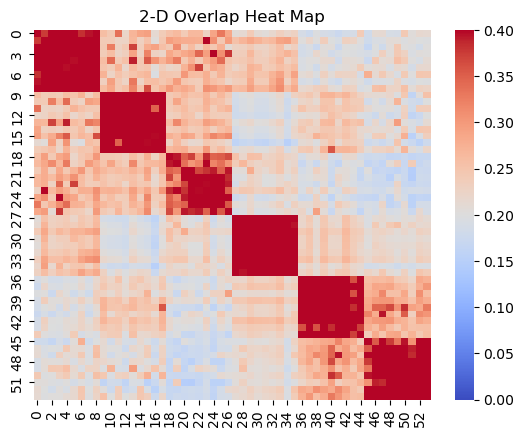

In [10]:
# Overlap with randomization, block size 100
Allohub_plots.plot_overlap(overlap_100.get_overlap_matrix(), vmax=0.4, action="show")

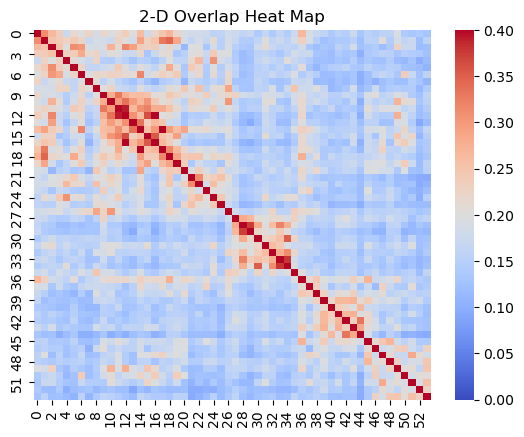

In [11]:
# Overlap without randomization, block size 100
Allohub_plots.plot_overlap(overlap_100_norand.get_overlap_matrix(), vmax=0.4, action="show")

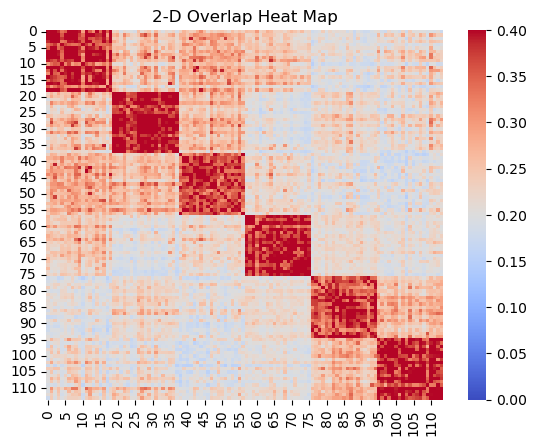

In [12]:
# Overlap with randomization, block size  50
Allohub_plots.plot_overlap(overlap_50.get_overlap_matrix(), vmax=0.4, action="show")

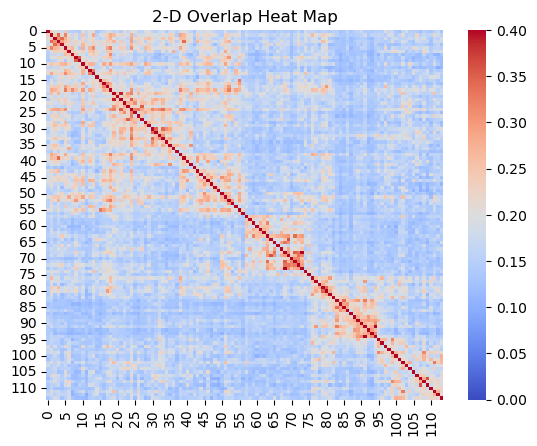

In [13]:
# Overlap without randomization, block size 50
Allohub_plots.plot_overlap(overlap_50_norand.get_overlap_matrix(), vmax=0.4, action="show")

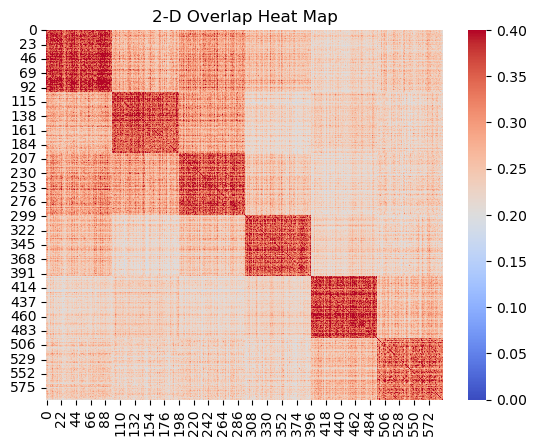

In [14]:
# Overlap with randomization, block size  10
Allohub_plots.plot_overlap(overlap_10.get_overlap_matrix(), vmax=0.4, action="show")

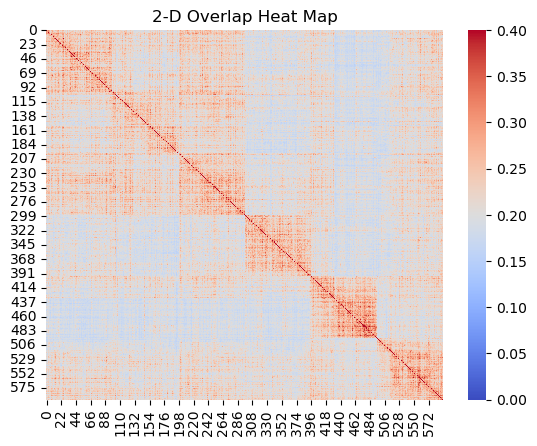

In [15]:
# Overlap without randomization, block size 10
Allohub_plots.plot_overlap(overlap_10_norand.get_overlap_matrix(), vmax=0.4, action="show")

In [16]:
# Compute similarities betweeen eigensystems, block size 100
similarity_matrix_100_norand = overlap_100_norand.compute_similarities()
similarity_matrix_100 = overlap_100.compute_similarities()
similarity_matrix_50_norand = overlap_50_norand.compute_similarities()
similarity_matrix_50 = overlap_50.compute_similarities()
similarity_matrix_10_norand = overlap_10_norand.compute_similarities()
similarity_matrix_10 = overlap_10.compute_similarities()

SIMILARITIES BETWEEN TRAJECTORY 0  and 1
	Overlap between trajectories: 0.1965
	Overlap of trajectory 1 with itself: 0.3076
	Overlap of trajectory 2 with itself: 0.3663
 Similary 0.8596
SIMILARITIES BETWEEN TRAJECTORY 0  and 2
	Overlap between trajectories: 0.1925
	Overlap of trajectory 1 with itself: 0.3076
	Overlap of trajectory 2 with itself: 0.2977
 Similary 0.8898
SIMILARITIES BETWEEN TRAJECTORY 0  and 3
	Overlap between trajectories: 0.1557
	Overlap of trajectory 1 with itself: 0.3076
	Overlap of trajectory 2 with itself: 0.3256
 Similary 0.8391
SIMILARITIES BETWEEN TRAJECTORY 0  and 4
	Overlap between trajectories: 0.1438
	Overlap of trajectory 1 with itself: 0.3076
	Overlap of trajectory 2 with itself: 0.3039
 Similary 0.8381
SIMILARITIES BETWEEN TRAJECTORY 0  and 5
	Overlap between trajectories: 0.1421
	Overlap of trajectory 1 with itself: 0.3076
	Overlap of trajectory 2 with itself: 0.2909
 Similary 0.8428
SIMILARITIES BETWEEN TRAJECTORY 1  and 2
	Overlap between trajectories

In [17]:
# Statistics of sampling convergence for block size 100
# The simulation grous are 0,1,2=inactive 3,4,5=active

# Without randomization
within_conditions = [similarity_matrix_100_norand[0][1], similarity_matrix_100_norand[0][2], similarity_matrix_100_norand[1][2], 
                     similarity_matrix_100_norand[3][4], similarity_matrix_100_norand[3][5], similarity_matrix_100_norand[4][5]]

between_conditions = [similarity_matrix_100_norand[0][3], similarity_matrix_100_norand[0][4], similarity_matrix_100_norand[0][5], 
                      similarity_matrix_100_norand[1][3], similarity_matrix_100_norand[1][4], similarity_matrix_100_norand[1][5],
                      similarity_matrix_100_norand[2][3], similarity_matrix_100_norand[2][4], similarity_matrix_100_norand[2][5]]

tat, p_value = ttest_ind(within_conditions, between_conditions, equal_var=False, alternative='greater')

print(f"p-value of convergence within vs between conditions for the non randomization encoded trajectory with block 100 is {p_value}")

within_conditions = [similarity_matrix_50_norand[0][1], similarity_matrix_50_norand[0][2], similarity_matrix_50_norand[1][2], 
                     similarity_matrix_50_norand[3][4], similarity_matrix_50_norand[3][5], similarity_matrix_50_norand[4][5]]

between_conditions = [similarity_matrix_50_norand[0][3], similarity_matrix_50_norand[0][4], similarity_matrix_50_norand[0][5], 
                      similarity_matrix_50_norand[1][3], similarity_matrix_50_norand[1][4], similarity_matrix_50_norand[1][5],
                      similarity_matrix_50_norand[2][3], similarity_matrix_50_norand[2][4], similarity_matrix_50_norand[2][5]]

tat, p_value = ttest_ind(within_conditions, between_conditions, equal_var=False, alternative='greater')

print(f"p-value of convergence within vs between conditions for the non randomization encoded trajectory with block 50 is {p_value}")

within_conditions = [similarity_matrix_10_norand[0][1], similarity_matrix_10_norand[0][2], similarity_matrix_10_norand[1][2], 
                     similarity_matrix_10_norand[3][4], similarity_matrix_10_norand[3][5], similarity_matrix_10_norand[4][5]]

between_conditions = [similarity_matrix_10_norand[0][3], similarity_matrix_10_norand[0][4], similarity_matrix_10_norand[0][5], 
                      similarity_matrix_10_norand[1][3], similarity_matrix_10_norand[1][4], similarity_matrix_10_norand[1][5],
                      similarity_matrix_10_norand[2][3], similarity_matrix_10_norand[2][4], similarity_matrix_10_norand[2][5]]

tat, p_value = ttest_ind(within_conditions, between_conditions, equal_var=False, alternative='greater')

print(f"p-value of convergence within vs between conditions for the non randomization encoded trajectory with block 10 is {p_value}")


# With randomization
within_conditions = [similarity_matrix_100[0][1], similarity_matrix_100[0][2], similarity_matrix_100[1][2], 
                     similarity_matrix_100[3][4], similarity_matrix_100[3][5], similarity_matrix_100[4][5]]

between_conditions = [similarity_matrix_100[0][3], similarity_matrix_100[0][4], similarity_matrix_100[0][5], 
                      similarity_matrix_100[1][3], similarity_matrix_100[1][4], similarity_matrix_100[1][5],
                      similarity_matrix_100[2][3], similarity_matrix_100[2][4], similarity_matrix_100[2][5]]

tat, p_value = ttest_ind(within_conditions, between_conditions, equal_var=False, alternative='greater')

print(f"p-value of convergence within vs between conditions for the randomized encoded trajectory with block 100 is {p_value}")

within_conditions = [similarity_matrix_50[0][1], similarity_matrix_50[0][2], similarity_matrix_50[1][2], 
                     similarity_matrix_50[3][4], similarity_matrix_50[3][5], similarity_matrix_50[4][5]]

between_conditions = [similarity_matrix_50[0][3], similarity_matrix_50[0][4], similarity_matrix_50[0][5], 
                      similarity_matrix_50[1][3], similarity_matrix_50[1][4], similarity_matrix_50[1][5],
                      similarity_matrix_50[2][3], similarity_matrix_50[2][4], similarity_matrix_50[2][5]]

tat, p_value = ttest_ind(within_conditions, between_conditions, equal_var=False, alternative='greater')

print(f"p-value of convergence within vs between conditions for the randomized encoded trajectory with block 50 is {p_value}")

within_conditions = [similarity_matrix_10[0][1], similarity_matrix_10[0][2], similarity_matrix_10[1][2], 
                     similarity_matrix_10[3][4], similarity_matrix_10[3][5], similarity_matrix_10[4][5]]

between_conditions = [similarity_matrix_10[0][3], similarity_matrix_10[0][4], similarity_matrix_10[0][5], 
                      similarity_matrix_10[1][3], similarity_matrix_10[1][4], similarity_matrix_10[1][5],
                      similarity_matrix_10[2][3], similarity_matrix_10[2][4], similarity_matrix_10[2][5]]

tat, p_value = ttest_ind(within_conditions, between_conditions, equal_var=False, alternative='greater')

print(f"p-value of convergence within vs between conditions for the randomized encoded trajectory with block 10 is {p_value}")

p-value of convergence within vs between conditions for the non randomization encoded trajectory with block 100 is 0.05317949717130676
p-value of convergence within vs between conditions for the non randomization encoded trajectory with block 50 is 0.09275176445640934
p-value of convergence within vs between conditions for the non randomization encoded trajectory with block 10 is 0.05303464738267857
p-value of convergence within vs between conditions for the randomized encoded trajectory with block 100 is 0.004525261989032756
p-value of convergence within vs between conditions for the randomized encoded trajectory with block 50 is 0.02122564681572018
p-value of convergence within vs between conditions for the randomized encoded trajectory with block 10 is 0.03040943603611007


The similarity (convergence) for the non-randomized blocks of size 10 is barely significant (p-value ~ 0.05), while the randomization of blocks greatly helped the convergence of the signal, yielding with p-values < 0.05 for all block sizes.

## Up- and down-regulated fragment detection

Finally, we will compare the top differential MI fagments (= hits) for the different time-block sizes with and without randomization.

In [18]:
# Detect up- and down-regulated fragments
print("Find upregulated and downregulated fragments for randomized 100")

# With randomization, block size 100
updown_regulated_fragments = overlap_100.updown_regulation(traj_mapping=[0,0,0,1,1,1],splitting=True)
# The obtained dictionary has as keys the pairs of conditions. In this case (0,1).
# If more conditions were used one would have all the additional pairing (0,1), (0,2), (1,2) ....
t12_updown_100 = updown_regulated_fragments[(0,1)]

# Without randomization, block size 100
updown_regulated_fragments = overlap_100_norand.updown_regulation(traj_mapping=[0,0,0,1,1,1],splitting=True)
t12_updown_100_norand = updown_regulated_fragments[(0,1)]

# With randomization, block size 50
updown_regulated_fragments = overlap_50.updown_regulation(traj_mapping=[0,0,0,1,1,1],splitting=True)
t12_updown_50 = updown_regulated_fragments[(0,1)]

# # Without randomization, block size 50
updown_regulated_fragments = overlap_50_norand.updown_regulation(traj_mapping=[0,0,0,1,1,1],splitting=True)
t12_updown_50_norand = updown_regulated_fragments[(0,1)]

# With randomization, block size 10
updown_regulated_fragments = overlap_10.updown_regulation(traj_mapping=[0,0,0,1,1,1],splitting=True)
t12_updown_10 = updown_regulated_fragments[(0,1)]

# # Without randomization, block size 10
updown_regulated_fragments = overlap_10_norand.updown_regulation(traj_mapping=[0,0,0,1,1,1],splitting=True)
t12_updown_10_norand = updown_regulated_fragments[(0,1)]

Find upregulated and downregulated fragments for randomized 100
     FragmentPairs  log2FoldChange       PValues  AdjustedPValues
0           (0, 1)       -0.522549  1.339345e-02         0.034581
1           (0, 2)       -1.094437  9.572307e-07         0.000008
2           (0, 3)       -0.218183  2.442496e-01         0.361814
3           (0, 4)       -0.760571  5.631604e-03         0.016565
4           (0, 5)       -0.766811  1.257980e-03         0.004601
...            ...             ...           ...              ...
7255    (117, 119)        0.375417  3.133037e-01         0.434994
7256    (117, 120)        0.276478  3.662286e-01         0.487410
7257    (118, 119)        1.172490  2.578103e-02         0.059703
7258    (118, 120)        1.076641  2.037327e-02         0.049140
7259    (119, 120)       -0.398515  1.525957e-02         0.038520

[7260 rows x 4 columns]
     FragmentPairs  log2FoldChange   PValues  AdjustedPValues
0           (0, 1)        0.454542  0.198620         0.43

Now we can filter the fragment pairs based on their p-value and fold change.

In [19]:
# Filtering parameters
pval_threshold = 0.01
fold_change_threshold = 2

# First extract significant fragments
significant_fragments_100 = t12_updown_100[t12_updown_100['AdjustedPValues'] < pval_threshold]
significant_fragments_100_norand = t12_updown_100_norand[t12_updown_100_norand['AdjustedPValues'] < pval_threshold]
significant_fragments_50 = t12_updown_50[t12_updown_50['AdjustedPValues'] < pval_threshold]
significant_fragments_50_norand = t12_updown_50_norand[t12_updown_50_norand['AdjustedPValues'] < pval_threshold]
significant_fragments_10 = t12_updown_10[t12_updown_10['AdjustedPValues'] < pval_threshold]
significant_fragments_10_norand = t12_updown_10_norand[t12_updown_10_norand['AdjustedPValues'] < pval_threshold]

In [20]:
# Second (with randomization), filter by fold change and print top 5 hits
# With randomization, block size 100
up_reg_100 = significant_fragments_100[significant_fragments_100['log2FoldChange'] > fold_change_threshold].sort_values('log2FoldChange', ascending=False)
print(up_reg_100.head(5))

# With randomization, block size 50
up_reg_50 = significant_fragments_50[significant_fragments_50['log2FoldChange'] > fold_change_threshold].sort_values('log2FoldChange', ascending=False)
print(up_reg_50.head(5))

# With randomization, block size 10
up_reg_10 = significant_fragments_10[significant_fragments_10['log2FoldChange'] > fold_change_threshold].sort_values('log2FoldChange', ascending=False)
print(up_reg_10.head(5))

     FragmentPairs  log2FoldChange       PValues  AdjustedPValues
1776      (15, 97)        8.568563  1.143804e-12     3.533624e-11
2865      (26, 97)        5.910179  5.701885e-21     1.799812e-18
1131       (9, 97)        4.551334  1.376245e-14     6.404831e-13
6801      (90, 97)        4.501422  2.943828e-13     1.037485e-11
1020       (8, 97)        4.158793  3.712417e-10     6.224514e-09
     FragmentPairs  log2FoldChange       PValues  AdjustedPValues
2865      (26, 97)        6.894309  2.244594e-43     3.259151e-40
6692     (86, 114)        5.866300  5.037963e-05     1.819682e-04
1892     (16, 109)        5.579663  2.665850e-05     1.008025e-04
7187    (108, 114)        4.949725  3.119012e-03     7.655182e-03
1131       (9, 97)        4.948381  5.884336e-35     1.256479e-32
     FragmentPairs  log2FoldChange        PValues  AdjustedPValues
1131       (9, 97)        6.427045  2.114277e-161    2.558275e-158
2865      (26, 97)        6.059063  1.470354e-122    5.083224e-120
6587   

Using the randomization approach, the three different time-block sizes yield similar sets of up-regulated fragments.

In [21]:
# Second (without randomization), filter by fold change and print top 5 hits
# Without randomization, block size 100
up_reg_100_norand = significant_fragments_100_norand[significant_fragments_100_norand['log2FoldChange'] > fold_change_threshold].sort_values('log2FoldChange', ascending=False)
print(up_reg_100.head(5))

# Without randomization, block size 50
up_reg_50_norand = significant_fragments_50_norand[significant_fragments_50_norand['log2FoldChange'] > fold_change_threshold].sort_values('log2FoldChange', ascending=False)
print(up_reg_50.head(5))

# Without randomization, block size 10
up_reg_10_norand = significant_fragments_10_norand[significant_fragments_10_norand['log2FoldChange'] > fold_change_threshold].sort_values('log2FoldChange', ascending=False)
print(up_reg_10.head(5))

     FragmentPairs  log2FoldChange       PValues  AdjustedPValues
1776      (15, 97)        8.568563  1.143804e-12     3.533624e-11
2865      (26, 97)        5.910179  5.701885e-21     1.799812e-18
1131       (9, 97)        4.551334  1.376245e-14     6.404831e-13
6801      (90, 97)        4.501422  2.943828e-13     1.037485e-11
1020       (8, 97)        4.158793  3.712417e-10     6.224514e-09
     FragmentPairs  log2FoldChange       PValues  AdjustedPValues
2865      (26, 97)        6.894309  2.244594e-43     3.259151e-40
6692     (86, 114)        5.866300  5.037963e-05     1.819682e-04
1892     (16, 109)        5.579663  2.665850e-05     1.008025e-04
7187    (108, 114)        4.949725  3.119012e-03     7.655182e-03
1131       (9, 97)        4.948381  5.884336e-35     1.256479e-32
     FragmentPairs  log2FoldChange        PValues  AdjustedPValues
1131       (9, 97)        6.427045  2.114277e-161    2.558275e-158
2865      (26, 97)        6.059063  1.470354e-122    5.083224e-120
6587   

In [4]:
# Function to obtain most frequent fragments in top hits
def get_top_fragments(df_reg):
    top_fragments_count = {}

    for fragment_pair in df_reg["FragmentPairs"]:
        top_fragments_count.setdefault(fragment_pair[0], 0) # record first fragment of the pair
        top_fragments_count.setdefault(fragment_pair[1], 0) # record second fragment of the pair
        top_fragments_count[fragment_pair[0]] += 1
        top_fragments_count[fragment_pair[1]] += 1

    # sort based on counts
    top_fragments_count = dict(sorted(top_fragments_count.items(), key=lambda item: item[1], reverse=True))

    return top_fragments_count

# With randomization, block size 100
top_fragments_count = get_top_fragments(up_reg_100)
# Print top 5 most appearing fragments
dict_keys = list(top_fragments_count.keys())
print("NtrC 100 block size randomized")
for i in range(5):
    frag = dict_keys[i]
    print(f"Fragment {frag} appears {top_fragments_count[frag]} times.")

# With randomization, block size 50
top_fragments_count = get_top_fragments(up_reg_50)
# Print top 5 most appearing fragments
dict_keys = list(top_fragments_count.keys())
print("NtrC 50 block size randomized")
for i in range(5):
    frag = dict_keys[i]
    print(f"Fragment {frag} appears {top_fragments_count[frag]} times.")

# With randomization, block size 10
top_fragments_count = get_top_fragments(up_reg_10)
# Print top 5most appearing fragments
dict_keys = list(top_fragments_count.keys())
print("NtrC 10 block size randomized")
for i in range(5):
    frag = dict_keys[i]
    print(f"Fragment {frag} appears {top_fragments_count[frag]} times.")

NameError: name 'up_reg_100' is not defined

All block sizes yielded similar results, i.e. the same key fragments appear among the top hits.

In [23]:
# Without randomization, block size 100
top_fragments_count = get_top_fragments(up_reg_100_norand)
# Print top 5 most appearing fragments
dict_keys = list(top_fragments_count.keys())
print("NtrC 100 block size non randomized")
for i in range(5):
    frag = dict_keys[i]
    print(f"Fragment {frag} appears {top_fragments_count[frag]} times.")

# Without randomization, block size 50
top_fragments_count = get_top_fragments(up_reg_50_norand)
# Print top 5 most appearing fragments
dict_keys = list(top_fragments_count.keys())
print("NtrC 50 block size non randomized")
for i in range(5):
    frag = dict_keys[i]
    print(f"Fragment {frag} appears {top_fragments_count[frag]} times.")

# Without randomization, block size 10
top_fragments_count = get_top_fragments(up_reg_10_norand)
# Print top 5 most appearing fragments
dict_keys = list(top_fragments_count.keys())
print("NtrC 10 block size non randomized")
for i in range(5):
    frag = dict_keys[i]
    print(f"Fragment {frag} appears {top_fragments_count[frag]} times.")

NtrC 100 block size non randomized
Fragment 89 appears 20 times.
Fragment 91 appears 20 times.
Fragment 97 appears 19 times.
Fragment 90 appears 17 times.
Fragment 88 appears 12 times.
NtrC 50 block size non randomized
Fragment 97 appears 15 times.
Fragment 91 appears 9 times.
Fragment 90 appears 7 times.
Fragment 89 appears 6 times.
Fragment 96 appears 6 times.
NtrC 10 block size non randomized
Fragment 83 appears 22 times.
Fragment 60 appears 19 times.
Fragment 84 appears 16 times.
Fragment 58 appears 9 times.
Fragment 62 appears 9 times.


Also here a similar signal can be recovered for the top hits.

## Conclusions

In this section, we have examined how to directly encode MD trajectories into Structural Alphabets and observed  improvements in consistency and reproducibility of the results obtained by employing randomized encoding blocks and selection of sutable time-block sizes.

# Comparison of Structural Alphabets *3DI* and *M32K25*

In this section the Structural Alphabets *3DI* and *M32k25* are being compared.

We will use a time-block size of 100 and randomized blocks for both alphabets.
This section will recapitulate the above process, with the exception of the step to encode the MD trajectories into strucrual strings via a Structural Alphabet; however, the resulting files are already available as pre-computed files in the data folder.
If the previous section already has been run, the user can skip the lines for all pre-computed objects.

In [24]:
# Initialize Structural Alphabet trajectory handler
print("Initialize Structural Alphabet trajectory handler")

# Set seeds for reproducibility
seed = 42  # Replace with any integer
import random
np.random.seed(seed)
random.seed(seed)

# with randomization only in this section
sa_ntrc_active_100_1 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_100_2 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_active_100_3 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_inactive_100_1 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_100_2 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_ntrc_inactive_100_3 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_ntrc_active_100_1_3di = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["3DI"])
sa_ntrc_active_100_2_3di = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["3DI"])
sa_ntrc_active_100_3_3di = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["3DI"])

sa_ntrc_inactive_100_1_3di = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["3DI"])
sa_ntrc_inactive_100_2_3di = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["3DI"])
sa_ntrc_inactive_100_3_3di = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["3DI"])

# Load data
sa_ntrc_active_100_1.load_data("data_NtrC/encoded_NtrC_active_repl1_mk.sa")
sa_ntrc_active_100_2.load_data("data_NtrC/encoded_NtrC_active_repl2_mk.sa")
sa_ntrc_active_100_3.load_data("data_NtrC/encoded_NtrC_active_repl3_mk.sa")

sa_ntrc_inactive_100_1.load_data("data_NtrC/encoded_NtrC_inactive_repl1_mk.sa")
sa_ntrc_inactive_100_2.load_data("data_NtrC/encoded_NtrC_inactive_repl2_mk.sa")
sa_ntrc_inactive_100_3.load_data("data_NtrC/encoded_NtrC_inactive_repl3_mk.sa")

sa_ntrc_active_100_1_3di.load_data("data_NtrC/encoded_NtrC_active_repl1_3di.sa")
sa_ntrc_active_100_2_3di.load_data("data_NtrC/encoded_NtrC_active_repl2_3di.sa")
sa_ntrc_active_100_3_3di.load_data("data_NtrC/encoded_NtrC_active_repl3_3di.sa")

sa_ntrc_inactive_100_1_3di.load_data("data_NtrC/encoded_NtrC_inactive_repl1_3di.sa")
sa_ntrc_inactive_100_2_3di.load_data("data_NtrC/encoded_NtrC_inactive_repl2_3di.sa")
sa_ntrc_inactive_100_3_3di.load_data("data_NtrC/encoded_NtrC_inactive_repl3_3di.sa")


Initialize Structural Alphabet trajectory handler


## Trajectory examination

One can examine the encoded structure string as well as all other analysis using the provided plotting functions.

Alternatively, one can addapt the provided plotting functions for other applications.
They are all locate din the file Allohub_plots.py

To display the plots the argument action = "show" should be used while for saving to a file it should be action="save"
If the save option is provided the name of the file can be specified with name="my_name.png".
The format of the image will depend on the format specified in the file name.

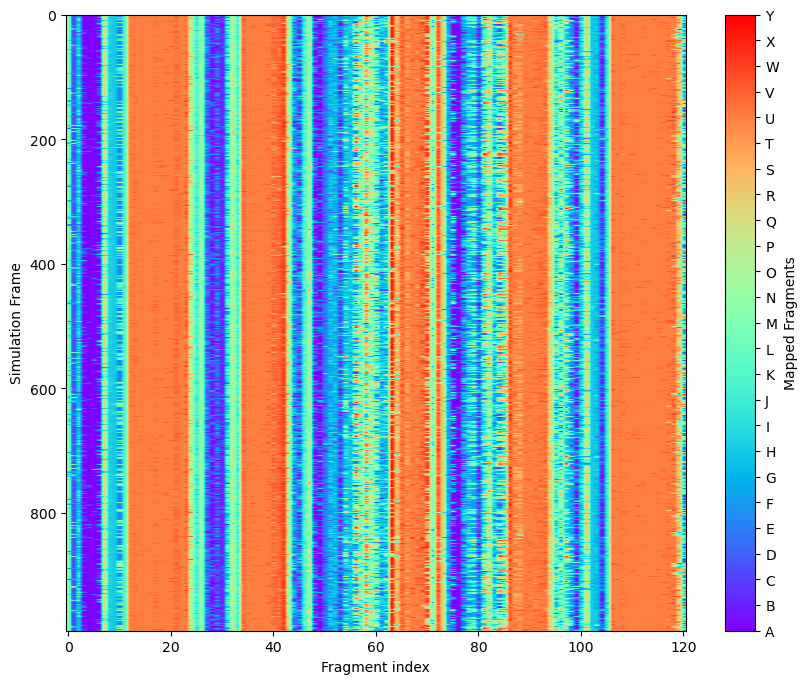

In [25]:
# Plot the randomized trajectory of the Structural Alphabet M32K25 of NtrC active repl1
Allohub_plots.plot_SA_traj(sa_ntrc_active_100_1.get_int_traj(), SAtraj.ALPHABETS["M32K25"], action="show")

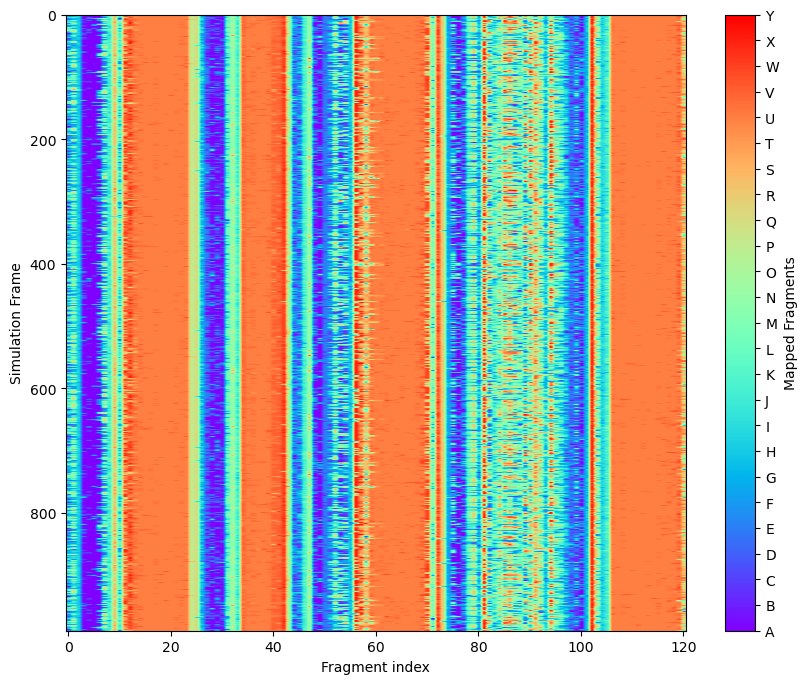

In [26]:
# Plot the randomized trajectory of the Structural Alphabet M32K25 of NtrC inactive repl1
Allohub_plots.plot_SA_traj(sa_ntrc_inactive_100_1.get_int_traj(), SAtraj.ALPHABETS["M32K25"], action="show")

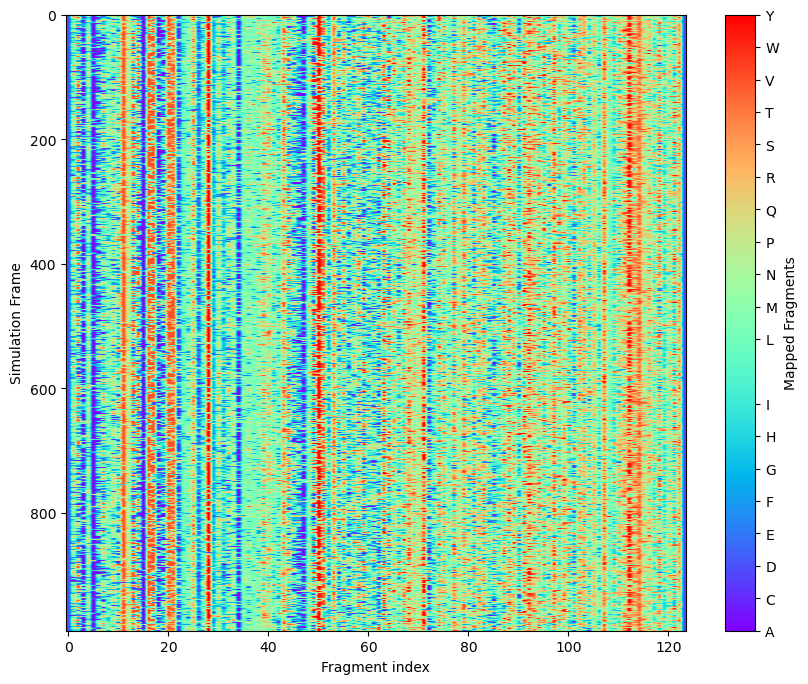

In [27]:
# Plot the randomized trajectory of the Structural Alphabet 3DI of NtrC active repl1
Allohub_plots.plot_SA_traj(sa_ntrc_active_100_1_3di.get_int_traj(), SAtraj.ALPHABETS["3DI"], action="show")

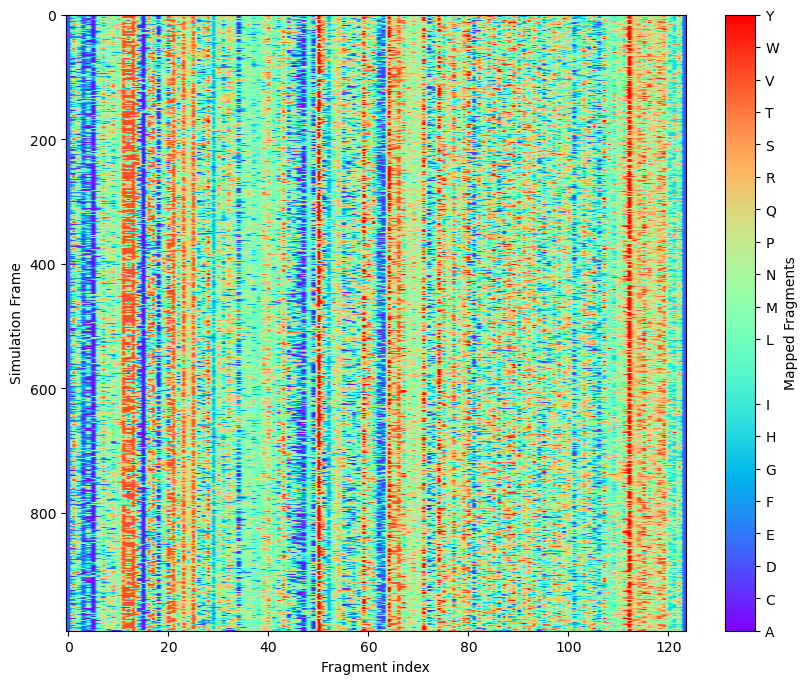

In [28]:
# Plot the randomized trajectory of the Structural Alphabet 3DI of NtrC inactive repl1
Allohub_plots.plot_SA_traj(sa_ntrc_inactive_100_1_3di.get_int_traj(), SAtraj.ALPHABETS["3DI"], action="show")

From the trajectory plots alone, one can already appreciate differences.
M32K25 captures clear differences around the fragments at positions ~90 and shows small difference on stable regions while the 3DI alphabet is better are capturing small difference in all the protein but does not capture as well the conformation change at positions ~90 

## Mutual information analysis

We will proceed to compute the mutual information for each block.
Each trajectory will produce 9 blocks of 100 ns each.

In [29]:
print("Calculate the mutual information")
# One can specify the number of workers to parallelize the process. max_workers=None would use all available resources.

mi_ntrc_inactive_100_1 = sa_ntrc_inactive_100_1.compute_mis(max_workers=7)
print("NtrC inactive repl 1 finished")
mi_ntrc_inactive_100_2 = sa_ntrc_inactive_100_2.compute_mis(max_workers=7)
print("NtrC inactive repl 2 finished")
mi_ntrc_inactive_100_3 = sa_ntrc_inactive_100_3.compute_mis(max_workers=7)
print("NtrC inactive repl 3 finished")

mi_ntrc_active_100_1 = sa_ntrc_active_100_1.compute_mis(max_workers=7)
print("NtrC active repl 1 finished")
mi_ntrc_active_100_2 = sa_ntrc_active_100_2.compute_mis(max_workers=7)
print("NtrC active repl 2 finished")
mi_ntrc_active_100_3 = sa_ntrc_active_100_3.compute_mis(max_workers=7)
print("NtrC active repl 3 finished")

mi_ntrc_inactive_100_1_3di = sa_ntrc_inactive_100_1_3di.compute_mis(max_workers=7)
print("NtrC inactive, 3di alphabet, repl 1 finished")
mi_ntrc_inactive_100_2_3di = sa_ntrc_inactive_100_2_3di.compute_mis(max_workers=7)
print("NtrC inactive, 3di alphabet, repl 2 finished")
mi_ntrc_inactive_100_3_3di = sa_ntrc_inactive_100_3_3di.compute_mis(max_workers=7)
print("NtrC inactive, 3di alphabet, repl 3 finished")

mi_ntrc_active_100_1_3di = sa_ntrc_active_100_1_3di.compute_mis(max_workers=7)
print("NtrC active, 3di alphabet, repl 1 finished")
mi_ntrc_active_100_2_3di = sa_ntrc_active_100_2_3di.compute_mis(max_workers=7)
print("NtrC active, 3di alphabet, repl 2 finished")
mi_ntrc_active_100_3_3di = sa_ntrc_active_100_3_3di.compute_mis(max_workers=7)
print("NtrC active, 3di alphabet, repl 3 finished")

Calculate the MI information
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:29<00:00,  3.27s/block]


TRAJECTORY COMPLETED
NtrC inactive repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:32<00:00,  3.67s/block]


TRAJECTORY COMPLETED
NtrC inactive repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:34<00:00,  3.81s/block]


TRAJECTORY COMPLETED
NtrC inactive repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:32<00:00,  3.57s/block]


TRAJECTORY COMPLETED
NtrC active repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:32<00:00,  3.60s/block]


TRAJECTORY COMPLETED
NtrC active repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:32<00:00,  3.58s/block]


TRAJECTORY COMPLETED
NtrC active repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:29<00:00,  3.30s/block]


TRAJECTORY COMPLETED
NtrC inactive, 3di alphabet, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:23<00:00,  2.59s/block]


TRAJECTORY COMPLETED
NtrC inactive, 3di alphabet, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:22<00:00,  2.53s/block]


TRAJECTORY COMPLETED
NtrC inactive, 3di alphabet, repl 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:30<00:00,  3.37s/block]


TRAJECTORY COMPLETED
NtrC active, 3di alphabet, repl 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:25<00:00,  2.84s/block]


TRAJECTORY COMPLETED
NtrC active, 3di alphabet, repl 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 9/9 [00:26<00:00,  2.99s/block]

TRAJECTORY COMPLETED
NtrC active, 3di alphabet, repl 3 finished


## Shannon entropy analysis

The Shannon entropy of the fragments set per structural string alignment gives an idea of structural flexibility at that protein position.
In the case of the M32k25 alphabet, this analysis is complementary to a fluctuation analysis in Cartesian space, such as RMSF. The fragment entropy captures local conformational changes and, being based on internal coordinates, is insensitive to global roto-translations of the protein.

In [30]:
# Compute the Shannon entropy
print("Compute the Shannon entropy")

entropy_ntrc_active_1 = sa_ntrc_active_100_1.compute_entropy()
entropy_ntrc_active_2 = sa_ntrc_active_100_2.compute_entropy()
entropy_ntrc_active_3 = sa_ntrc_active_100_3.compute_entropy()

entropy_ntrc_inactive_1 = sa_ntrc_inactive_100_1.compute_entropy()
entropy_ntrc_inactive_2 = sa_ntrc_inactive_100_2.compute_entropy()
entropy_ntrc_inactive_3 = sa_ntrc_inactive_100_3.compute_entropy()

entropy_ntrc_active_1_3di = sa_ntrc_active_100_1_3di.compute_entropy()
entropy_ntrc_active_2_3di = sa_ntrc_active_100_2_3di.compute_entropy()
entropy_ntrc_active_3_3di = sa_ntrc_active_100_3_3di.compute_entropy()

entropy_ntrc_inactive_1_3di = sa_ntrc_inactive_100_1_3di.compute_entropy()
entropy_ntrc_inactive_2_3di = sa_ntrc_inactive_100_2_3di.compute_entropy()
entropy_ntrc_inactive_3_3di = sa_ntrc_inactive_100_3_3di.compute_entropy()

Compute the shanon entropy


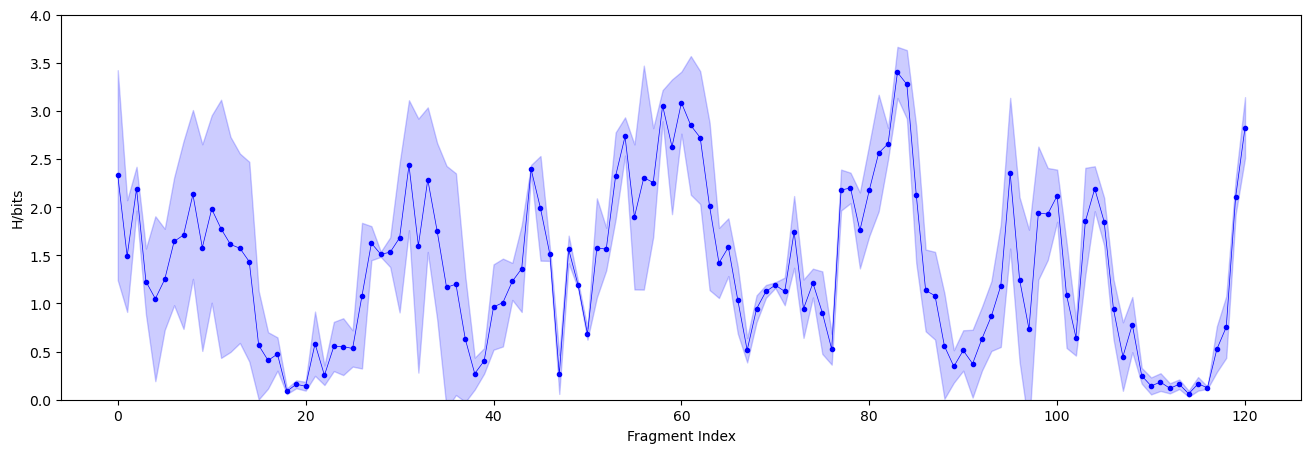

In [31]:
# Plot the entropies of active NtrC with their standard deviations for the trajectories encoded using the M32K25 alphabet.
Allohub_plots.plot_shanon_entropy_sd([entropy_ntrc_active_1, entropy_ntrc_active_2, entropy_ntrc_active_3], action="show", ylim=(0,4))

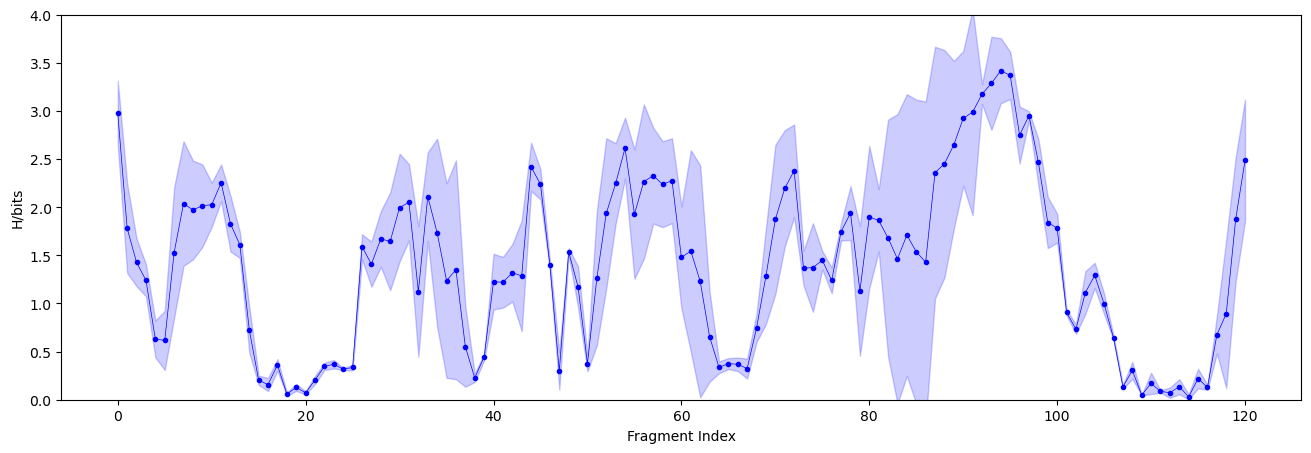

In [32]:
# Plot the entropies of inactive NtrC with their standard deviations for the trajectories encoded using the M32K25 alphabet.
Allohub_plots.plot_shanon_entropy_sd([entropy_ntrc_inactive_1, entropy_ntrc_inactive_2, entropy_ntrc_inactive_3], action="show", ylim=(0,4))

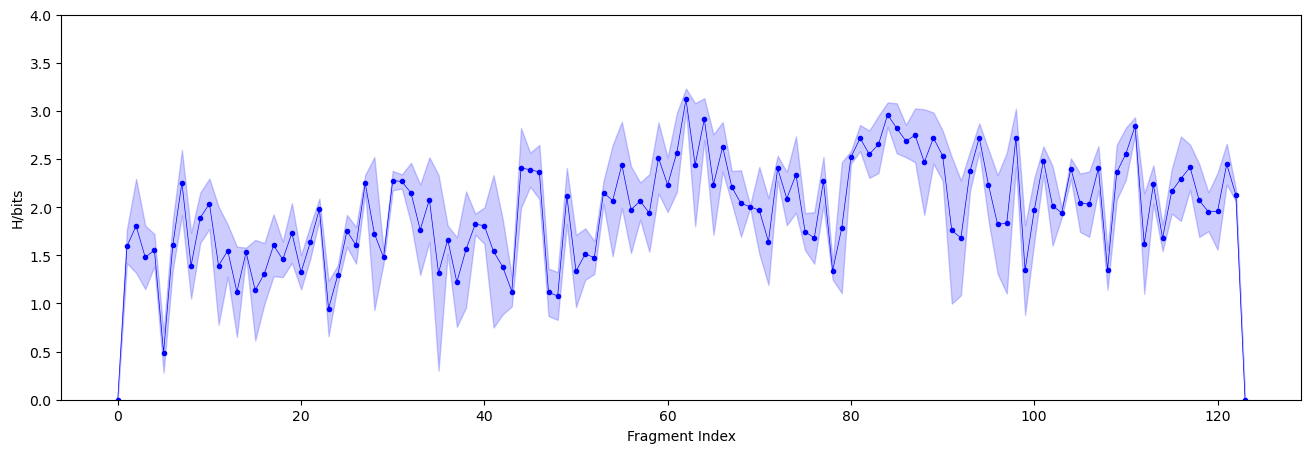

In [33]:
# Plot the entropies of active NtrC with their standard deviations for the trajectories encoded using the 3DI alphabet.
Allohub_plots.plot_shanon_entropy_sd([entropy_ntrc_active_1_3di, entropy_ntrc_active_2_3di, entropy_ntrc_active_3_3di], action="show", ylim=(0,4))

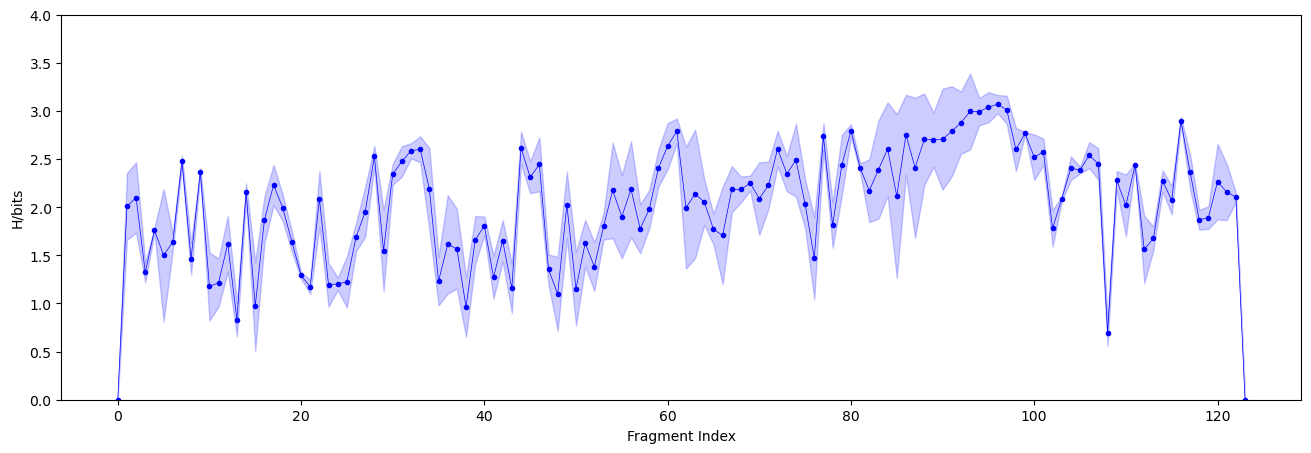

In [34]:
# Plot the entropies of inactive NtrC with their standard deviations for the trajectories encoded with 3DI alphabet.
Allohub_plots.plot_shanon_entropy_sd([entropy_ntrc_inactive_1_3di, entropy_ntrc_inactive_2_3di, entropy_ntrc_inactive_3_3di], action="show", ylim=(0,4))

The differences can be better observed by substracting the mean entropy arrays.

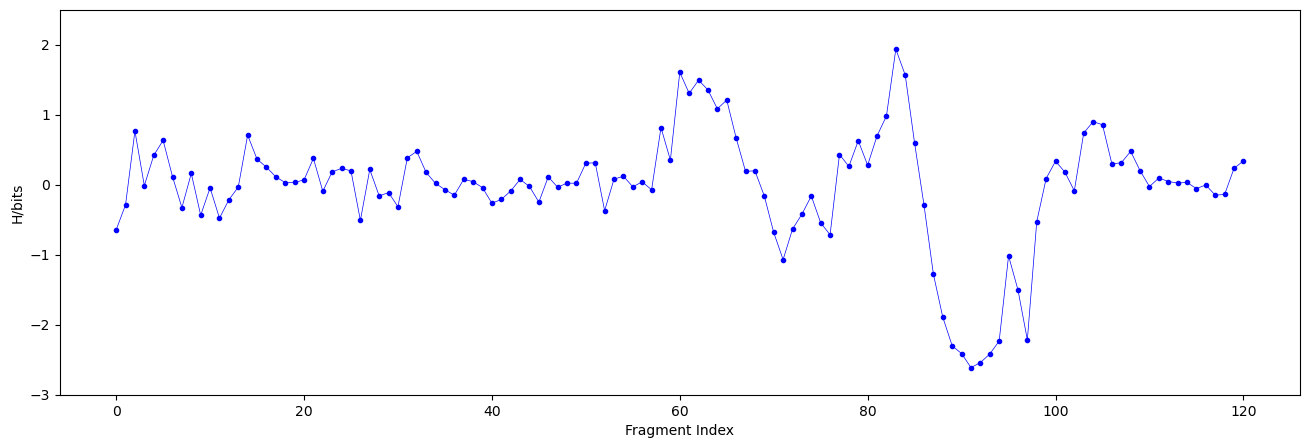

In [35]:
# Compute the mean entropy per condition, using the M32K25 alphabet.
mean_act = np.mean([np.array(entropy_ntrc_active_1), np.array(entropy_ntrc_active_2), np.array(entropy_ntrc_active_3)], axis=0)

mean_inact = np.mean([np.array(entropy_ntrc_inactive_1), np.array(entropy_ntrc_inactive_2), np.array(entropy_ntrc_inactive_3)], axis=0)

diff = mean_act - mean_inact

# Plot the mean entropy
Allohub_plots.plot_shanon_entropy(diff, ylim=(-3,2.5), action="show")

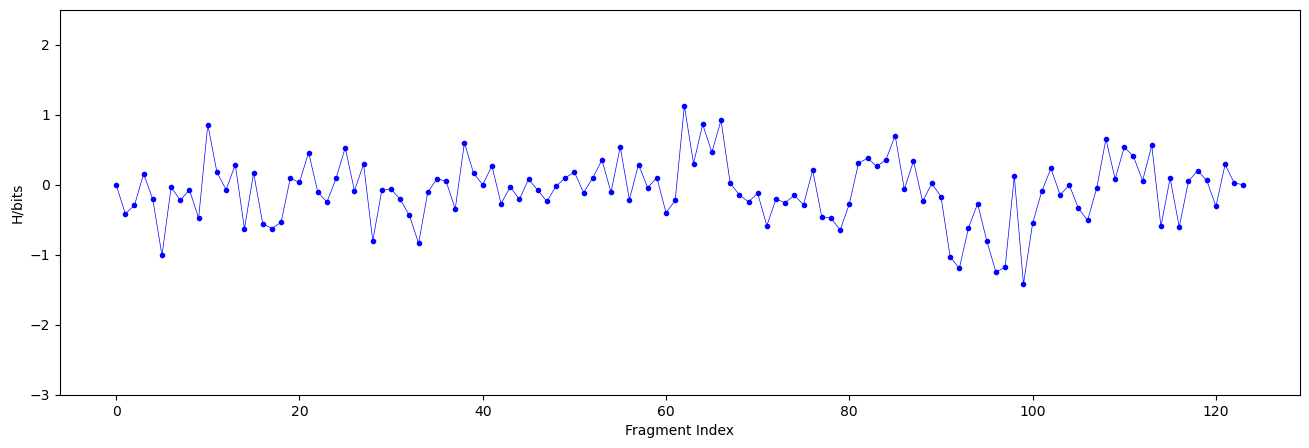

In [36]:
# Compute the mean entropy per condition for the 3DI alphabet
mean_act = np.mean([np.array(entropy_ntrc_active_1_3di), np.array(entropy_ntrc_active_2_3di), np.array(entropy_ntrc_active_3_3di)], axis=0)

mean_inact = np.mean([np.array(entropy_ntrc_inactive_1_3di), np.array(entropy_ntrc_inactive_2_3di), np.array(entropy_ntrc_inactive_3_3di)], axis=0)

diff = mean_act - mean_inact

# Plot the mean entropy
Allohub_plots.plot_shanon_entropy(diff, ylim=(-3,2.5), action="show")

Positions around fragment 60 and 90 are known positions that undergo conformational and flexibility changes, suggesting that Allohubpy captures this effect successfully.

# Analysis of allosteric signals

Following the previous analysis, we will extract here important fragments and possible signaling pathways in the NtrC structure.
We will use the trajectories encoded using *M32K25*, which captured the conformational dynamics with more sensitivity than *3DI*.

## Eigenvector decomposition

The eigenvector decomposition of the obtained MI matrices can be used to assess sampling convergence.
The main motions of well-converged simulations should have relatively high eigenvector overlap (>0.3).

Overlap between replicates can be used as a way to estimate reliability of the results; in general, a higher convergence translates into higher confidence that the sampling was sufficiently complete.

In [37]:
# Perform an eigenvector decomposition of the MI matrices
from tqdm import tqdm

print("Perform an eigenvector decomposition of the MI matrices.")

for mi_tr in tqdm(mi_ntrc_active_100_1, desc="Eigenvector decomposition for NtrC active 1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_100_2, desc="Eigenvector decomposition for NtrC active 2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_active_100_3, desc="Eigenvector decomposition for NtrC active 3", unit="matrix"):
    mi_tr.compute_eigensystem()

for mi_tr in tqdm(mi_ntrc_inactive_100_1, desc="Eigenvector decomposition for NtrC inactive 1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_100_2, desc="Eigenvector decomposition for NtrC inactive 2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_ntrc_inactive_100_3, desc="Eigenvector decomposition for NtrC inactive 3", unit="matrix"):
    mi_tr.compute_eigensystem()

Do an eigenvector decomposition of the matrices


Eigenvector decomposition for NtrC inactive 3: 100%|██████████| 9/9 [00:00<00:00, 233.89matrix/s]


## Convergence analysis

Between-eigensystem (= digonalised MI matrix) overlap can be computed using the *overlap* object.

In this analysis we are using the top 3 eigenvectors, which should explain most of the observed variability.

In [ ]:
# Create the overlap handler to compute similarities between the trajectories

# M32K25
overlap_100 = Overlap.Overlap([mi_ntrc_inactive_100_1, mi_ntrc_inactive_100_2, mi_ntrc_inactive_100_3,
                               mi_ntrc_active_100_1,  mi_ntrc_active_100_2, mi_ntrc_active_100_3], ev_list=[0,1,2])
overlap_100.fill_overlap_matrix()

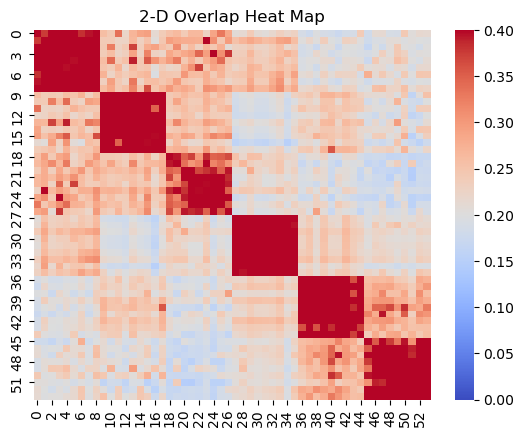

In [39]:
# Convergence with alphabet M32K25
Allohub_plots.plot_overlap(overlap_100.get_overlap_matrix(), vmax=0.4, action="show")

In [40]:
# Compute similarities between overlap matrices
similarity_matrix_100 = overlap_100.compute_similarities()

SIMILARITIES BETWEEN TRAJECTORY 0  and 1
	Overlap between trajectories: 0.2601
	Overlap of trajectory 1 with itself: 0.5077
	Overlap of trajectory 2 with itself: 0.5491
 Similary 0.7317
SIMILARITIES BETWEEN TRAJECTORY 0  and 2
	Overlap between trajectories: 0.2776
	Overlap of trajectory 1 with itself: 0.5077
	Overlap of trajectory 2 with itself: 0.4596
 Similary 0.7939
SIMILARITIES BETWEEN TRAJECTORY 0  and 3
	Overlap between trajectories: 0.2513
	Overlap of trajectory 1 with itself: 0.5077
	Overlap of trajectory 2 with itself: 0.5566
 Similary 0.7191
SIMILARITIES BETWEEN TRAJECTORY 0  and 4
	Overlap between trajectories: 0.2028
	Overlap of trajectory 1 with itself: 0.5077
	Overlap of trajectory 2 with itself: 0.5372
 Similary 0.6803
SIMILARITIES BETWEEN TRAJECTORY 0  and 5
	Overlap between trajectories: 0.2106
	Overlap of trajectory 1 with itself: 0.5077
	Overlap of trajectory 2 with itself: 0.5158
 Similary 0.6988
SIMILARITIES BETWEEN TRAJECTORY 1  and 2
	Overlap between trajectories

In [ ]:
# Statistics of sampling convergence using M32K25
# The simulation grous are 0,1,2=inactive 3,4,5=active
# The similarity_matrix contains the overlap between the indexed trajectories.
within_conditions = [similarity_matrix_100[0][1], similarity_matrix_100[0][2], similarity_matrix_100[1][2],
                     similarity_matrix_100[3][4], similarity_matrix_100[3][5], similarity_matrix_100[4][5]]

between_conditions = [similarity_matrix_100[0][3], similarity_matrix_100[0][4], similarity_matrix_100[0][5],
                      similarity_matrix_100[1][3], similarity_matrix_100[1][4], similarity_matrix_100[1][5],
                      similarity_matrix_100[2][3], similarity_matrix_100[2][4], similarity_matrix_100[2][5]]

tat, p_value = ttest_ind(within_conditions, between_conditions, equal_var=False, alternative='greater')

print(f"p-value of convergence within vs between conditions for NtrC with alphabet M32K25 is {p_value}")

The obtained p-values indicate that the convergence within replicates is signicantly different from the convergence between conditions; therefore, the analysis captured relevant signals for NtrC when comparing the active and inactive states.

## Detection of up- and down-regulated fragments

The next step is to detect up- and down-regulated fragments.
That is achieved by a stetistical contrast between simulated system states, here the inactive (0) and active (1) state of NtrC.

The function argument *splitting* controls whether the statistics should be computed using the mean MI matrix per replicate (*splitting = False*) or using all the mi matrices (splitting = True).

Using all MI matrices will show more coupled fragments, but also produce more false positives unless the background noise and potential batch effects are finely controlled.

For this analysis we will use all MI matrices.

In [42]:
# Find upregulated and downregulated fragments
print("Find upregulated and downregulated fragments")

# The fold change of non correlated points would produce a division by zero runtime warning this warnings can be silenced as following:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

updown_regulated_fragments = overlap_100.updown_regulation(traj_mapping=[0,0,0,1,1,1],splitting=True)

# The obtained dictionary has as keys the pairs of conditions. In this case (0,1).
# If more conditions were used one would have all the additional pairing (0,1), (0,2), (1,2) ....
t12_updown = updown_regulated_fragments[(0,1)]

Find upregulated and downregulated fragments
     FragmentPairs  log2FoldChange       PValues  AdjustedPValues
0           (0, 1)       -0.522549  1.339345e-02         0.034581
1           (0, 2)       -1.094437  9.572307e-07         0.000008
2           (0, 3)       -0.218183  2.442496e-01         0.361814
3           (0, 4)       -0.760571  5.631604e-03         0.016565
4           (0, 5)       -0.766811  1.257980e-03         0.004601
...            ...             ...           ...              ...
7255    (117, 119)        0.375417  3.133037e-01         0.434994
7256    (117, 120)        0.276478  3.662286e-01         0.487410
7257    (118, 119)        1.172490  2.578103e-02         0.059703
7258    (118, 120)        1.076641  2.037327e-02         0.049140
7259    (119, 120)       -0.398515  1.525957e-02         0.038520

[7260 rows x 4 columns]


Now we can filter the up and down regulated fragments based on a p value and fold change

In [54]:
# Filtering parameters
pval_threshold = 0.01
fold_change_threshold = 2

# First extract individual fragments for ease of access
fragment_pairs = t12_updown["FragmentPairs"]
f1 = [x[0] for x in fragment_pairs]
f2 = [x[1] for x in fragment_pairs]
t12_updown["f1"] = f1
t12_updown["f2"] = f2

# Extract significant fragments
significant_fragments = t12_updown[t12_updown['AdjustedPValues'] < pval_threshold]

# Second, filter by fold change and print top 10 up-regulated fragments
up_reg = significant_fragments[significant_fragments['log2FoldChange'] > fold_change_threshold].sort_values('log2FoldChange', ascending=False)
up_reg.head(10)

FragmentPairs  log2FoldChange       PValues  AdjustedPValues  f1  f2
1776      (15, 97)        8.568563  1.143804e-12     3.533624e-11  15  97
2865      (26, 97)        5.910179  5.701885e-21     1.799812e-18  26  97
1131       (9, 97)        4.551334  1.376245e-14     6.404831e-13   9  97
6801      (90, 97)        4.501422  2.943828e-13     1.037485e-11  90  97
1020       (8, 97)        4.158793  3.712417e-10     6.224514e-09   8  97
6290      (76, 97)        3.868711  2.552682e-21     9.266236e-19  76  97
6771      (89, 97)        3.846886  9.854762e-24     7.949508e-21  89  97
6702      (87, 91)        3.780066  5.791781e-11     1.161556e-09  87  91
6734      (88, 91)        3.757264  1.472253e-18     2.274161e-16  88  91
6858      (92, 97)        3.700540  1.155911e-22     5.994223e-20  92  97

In [55]:
# Show top 10 down-regulated fragments
down_reg = significant_fragments[significant_fragments['log2FoldChange'] < -fold_change_threshold].sort_values('log2FoldChange')
down_reg.head(10)


FragmentPairs  log2FoldChange       PValues  AdjustedPValues   f1   f2
7000     (97, 114)       -7.220985  2.519139e-04     1.123400e-03   97  114
6998     (97, 112)       -5.651724  1.822613e-03     6.364679e-03   97  112
1705      (15, 26)       -4.384441  1.095541e-03     4.095587e-03   15   26
693       (5, 109)       -4.013189  4.345503e-06     3.111277e-05    5  109
5608      (63, 65)       -3.802584  9.350739e-08     9.558103e-07   63   65
7095    (102, 109)       -3.725565  2.503383e-03     8.356120e-03  102  109
2592     (23, 109)       -3.657752  3.001072e-04     1.307790e-03   23  109
299        (2, 63)       -3.640988  8.256406e-17     7.309940e-15    2   63
5702     (64, 103)       -3.471873  8.752932e-11     1.667881e-09   64  103
5699     (64, 100)       -3.443561  8.360845e-08     8.659020e-07   64  100

In [56]:
# Most frequent fragments
top_fragments_count = {}

for fragment_pair in up_reg["FragmentPairs"]:
    top_fragments_count.setdefault(fragment_pair[0], 0) # record first fragment of the pair
    top_fragments_count.setdefault(fragment_pair[1], 0) # record second fragment of the pair
    top_fragments_count[fragment_pair[0]] += 1
    top_fragments_count[fragment_pair[1]] += 1

for fragment_pair in down_reg["FragmentPairs"]:
    top_fragments_count.setdefault(fragment_pair[0], 0) # record first fragment of the pair
    top_fragments_count.setdefault(fragment_pair[1], 0) # record second fragment of the pair
    top_fragments_count[fragment_pair[0]] += 1
    top_fragments_count[fragment_pair[1]] += 1

# sort based on counts
top_fragments_count = dict(sorted(top_fragments_count.items(), key=lambda item: item[1], reverse=True))

# Print top 10 most appearing fragments
dict_keys = list(top_fragments_count.keys())
for i in range(10):
    frag = dict_keys[i]
    print(f"Fragment {frag} appears {top_fragments_count[frag]} times.")


Fragment 64 appears 62 times.
Fragment 63 appears 60 times.
Fragment 90 appears 58 times.
Fragment 91 appears 57 times.
Fragment 89 appears 56 times.
Fragment 109 appears 49 times.
Fragment 97 appears 46 times.
Fragment 92 appears 27 times.
Fragment 88 appears 23 times.
Fragment 93 appears 14 times.


## Volcano plot

The volcano plot illustrates the fragments of interest as down- (blue) or up-regulated (red) points beyond the -/+2-fold threshold and 5% FDR threshold (adjusted p-value).

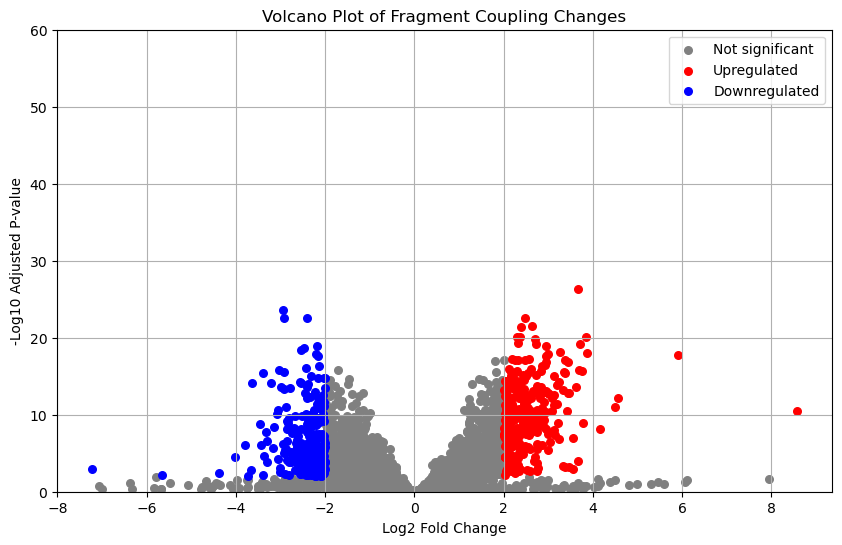

In [46]:
# Plot volcano plot of Up and Down regulated fragments
Allohub_plots.plot_updownregulation(t12_updown,  fold_threshold=fold_change_threshold, ylim=60, pvalue_threshold=pval_threshold, action="show")

In [58]:
# Check the pair 82 - 101
print(significant_fragments[significant_fragments["FragmentPairs"] == (82,101)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (83,101)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (84,101)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (82,102)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (83,102)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (84,102)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (82,103)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (83,103)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (84,103)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (82,104)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (83,104)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (84,104)])


Empty DataFrame
Columns: [FragmentPairs, log2FoldChange, PValues, AdjustedPValues, f1, f2]
Index: []
Empty DataFrame
Columns: [FragmentPairs, log2FoldChange, PValues, AdjustedPValues, f1, f2]
Index: []
     FragmentPairs  log2FoldChange   PValues  AdjustedPValues  f1   f2
6610     (84, 101)       -1.100826  0.000206         0.000949  84  101
     FragmentPairs  log2FoldChange  PValues  AdjustedPValues  f1   f2
6538     (82, 102)       -1.061542  0.00037         0.001576  82  102
     FragmentPairs  log2FoldChange   PValues  AdjustedPValues  f1   f2
6575     (83, 102)       -1.260447  0.000003         0.000024  83  102
     FragmentPairs  log2FoldChange   PValues  AdjustedPValues  f1   f2
6611     (84, 102)       -1.296439  0.000009         0.000062  84  102
     FragmentPairs  log2FoldChange       PValues  AdjustedPValues  f1   f2
6539     (82, 103)       -1.616095  5.427068e-10     8.736256e-09  82  103
     FragmentPairs  log2FoldChange       PValues  AdjustedPValues  f1   f2
6576   

In [59]:
# Check the pair 66 - 99
print(significant_fragments[significant_fragments["FragmentPairs"] == (66,99)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (67,99)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (68,99)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (66,100)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (67,100)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (68,100)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (66,101)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (67,101)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (68,101)])

# check  67 - (95,96)
print(significant_fragments[significant_fragments["FragmentPairs"] == (67,95)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (68,95)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (69,95)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (70,95)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (67,96)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (68,96)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (69,96)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (70,96)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (67,97)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (68,97)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (69,97)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (70,97)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (67,98)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (68,98)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (69,98)])
print(significant_fragments[significant_fragments["FragmentPairs"] == (70,98)])

     FragmentPairs  log2FoldChange       PValues  AdjustedPValues  f1  f2
5807      (66, 99)       -1.546874  1.110615e-09     1.704665e-08  66  99
Empty DataFrame
Columns: [FragmentPairs, log2FoldChange, PValues, AdjustedPValues, f1, f2]
Index: []
     FragmentPairs  log2FoldChange   PValues  AdjustedPValues  f1  f2
5912      (68, 99)        -1.00617  0.000136         0.000662  68  99
     FragmentPairs  log2FoldChange   PValues  AdjustedPValues  f1   f2
5808     (66, 100)       -2.247013  0.000043         0.000237  66  100
     FragmentPairs  log2FoldChange   PValues  AdjustedPValues  f1   f2
5861     (67, 100)       -1.655996  0.000082         0.000416  67  100
     FragmentPairs  log2FoldChange  PValues  AdjustedPValues  f1   f2
5913     (68, 100)       -1.637377  0.00002          0.00012  68  100
     FragmentPairs  log2FoldChange   PValues  AdjustedPValues  f1   f2
5809     (66, 101)       -1.608821  0.000025         0.000146  66  101
Empty DataFrame
Columns: [FragmentPairs, log2

Owing to the 4-residue size of the fragments, important fragments should be viewed as sets of residues rather than independent positions. To try to disambiguate the signalling effect and to assign individual wights to residues in the top fragments, we use Protein Language Models in the next section. 

From the top differentialy regulated fragments we detect positions with key reported residues involved in the activation of the protein.
The previously reported Y101-T82 switch appears in the significant hits as well as other important reported structural differences such as position *99* and *94* associated with key structural switches of residues F99 and Y94, respectively. F99 and Y94 appear more consistently as top hits, underlining their importance in the activation mechanism.

In the top hits of gragment pairs we find previously reported relevant structural contacts, such as the K67-Q96-Q95 motif (KQQ motif) and the F99-L66 pair.
Other residues from the β3−α3 loop (residue indices 60−63) and from the N-terminal half of α4 (residues indices 85−90) also appear as top hits, matching results from NMR experiments performed on this system.

## Disambiguation of Fragments

To determine the most important residues in a given fragment, we employ a Protein Large Language Model such as *ESM2-650M* and use the predicted likelihoods as a guide.
The next section will ilustrate that process.
First the distances between $C{\alpha}$ atoms need to be calculated, after that the important residues can be extracted with the SAPLM module.

In [60]:
# Compute distances between C_alpha atoms from a given PDB structure
import mdtraj as md

# Load trajectory
traj = md.load("data_NtrC/NtrC_active_nowat.pdb")

# Select only the C_alpha atoms
ca_indices = traj.topology.select('name CA')

# Extract the coordinates of C_alpha atoms
ca_positions = traj.xyz[0][ca_indices]

# Compute the pairwise distance matrix
distance_matrix = np.linalg.norm(ca_positions[:, np.newaxis, :] - ca_positions[np.newaxis, :, :], axis=-1)

# Convert to angstroms
distance_matrix *= 10

In [ ]:
from Allohubpy import SAPLM

# The sequence should match the one used in the simulations
traj = md.load("data_NtrC/NtrC_active_nowat.pdb")

# Create a subset trajectory containing only the protein
protein_traj = traj.atom_slice(traj.topology.select("protein"))

ntrc_sequence = ''.join([str(residue.code) for residue in protein_traj.topology.residues])


# Create the PLM handler. The fragment size for alphabet M32k25 is 4
esm_handler = SAPLM.SAPLM(fragment_size = 4)
esm_handler.set_sequence(ntrc_sequence)

# Extract likelihoods for top most appearing fragments
likelihood_df = esm_handler.fragment_likelihoods(fragment=64, offset=0)
print(likelihood_df)

likelihood_df = esm_handler.fragment_likelihoods(fragment=63, offset=0)
print(likelihood_df)

likelihood_df = esm_handler.fragment_likelihoods(fragment=90, offset=0)
print(likelihood_df)

likelihood_df = esm_handler.fragment_likelihoods(fragment=91, offset=0)
print(likelihood_df)

likelihood_df = esm_handler.fragment_likelihoods(fragment=89, offset=0)
print(likelihood_df)

likelihood_df = esm_handler.fragment_likelihoods(fragment=109, offset=0)
print(likelihood_df)

likelihood_df = esm_handler.fragment_likelihoods(fragment=97, offset=0)
print(likelihood_df)

likelihood_df = esm_handler.fragment_likelihoods(fragment=92, offset=0)
print(likelihood_df)

likelihood_df = esm_handler.fragment_likelihoods(fragment=88, offset=0)
print(likelihood_df)

likelihood_df = esm_handler.fragment_likelihoods(fragment=93, offset=0)
print(likelihood_df)